![image alt <](Images/numgrade-bigger.jpg)
![](Images/Pandas_logo.png)

# Introduction - structures pandas

Pandas est connu comme la librairie Python pour l'analyse de données structurées. Le nom pandas provient de "panel data", un terme utilisé en économie pour les jeux de données structurées multidimensionnelles (lorsque Wes McKinney a développé la librairie pandas, c'est l'analyse de données dans le domaine de la finance qui était visée).

Pandas permet de manipuler des données structurées et de les analyser via des fonctions conçues pour être rapides et faciles à utiliser. Pandas s'appuie sur NumPy (il hérite donc des performances de NumPy pour le traitement rapide des opérations sur les tableaux) et implémente en plus de nombreuses opérations que l'on retrouve pour les bases de données et pour les tableurs.

Le développement de pandas a commencé en 2008.

Site web officiel : [http://pandas.pydata.org/](http://pandas.pydata.org/)

Site web Github : [https://github.com/pandas-dev/pandas](https://github.com/pandas-dev/pandas)

Pandas implémente 2 types de structures : les séries (*Series*) et les tableaux de données (*DataFrame*).

![image alt >](Images/numgrade.png)
**Series** :   
 
Une série est un tableau à une dimension contenant des données associées à des étiquettes (data labels). Ces étiquettes seront appelées les indices (*index*).
 
**DataFrame (tableau de données)** :

Les DataFrames sont des tableaux à 2 dimensions. Ces tableaux pourront avoir des types de données différents et/ou des données manquantes. Les DataFrames possèdent des indices à la fois pour les lignes et les colonnes.

Comme de nombreuses librairies, il y a une façon standard d'importer pandas :

In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.2.3'

![image alt >](Images/numgrade.png)
## Série (series)

Dans pandas, une série est un tableau à une dimension de données indexées. Nous pouvons donc simplement construire une série à partir d'un tableau NumPy :

In [3]:
import numpy as np
import pandas as pd

In [4]:
a = np.linspace(0, 1, 5)
data = pd.Series(a)
data

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

Le résultat est une séquence d'indices (colonne de gauche - par défaut, les indices vont de 0 à N-1) et la séquence de valeurs (colonne de droite).

![image alt >](Images/numgrade.png)
Nous accédons aux indices et valeurs via les attributs *index* et *values* :

In [5]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
data.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Comme pour les tableaux NumPy, nous pouvons accéder aux données via l'indexation et le slicing :

In [7]:
data[0]

np.float64(0.0)

In [8]:
data[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

![image alt >](Images/numgrade.png)
La principale différence entre un tableau NumPy et une série pandas est l'indice (*index*) : 

L'indexation pour un tableau NumPy est *implicite* (les indices seront des entiers correspondant à la position dans le tableau) alors que pour une série pandas, l'indexation est *explicite*. Il peut être très intéressant de nommer les indices explicitement, pandas nous offre cette possibilité :

In [9]:
data = pd.Series(a, index=['a', 'b', 'c', 'd', 'e'])
data 

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

Il devient alors possible d'utiliser les nouveaux indices pour sélectionner les valeurs correspondantes :

In [10]:
data['c']

np.float64(0.5)

Notez qu'il est toujours possible d'appeler les données via l'indexation *implicite* mais il faudra ajouter .iloc (nous en reparlerons) :

In [11]:
data.iloc[2]

np.float64(0.5)

![image alt >](Images/numgrade.png)
Comme les séries font correspondre un indice à une valeur, les séries peuvent être pensées comme un dictionnaire. 

Pandas propose ainsi les mêmes opérations que l'on connaît pour les dictionnaires Python :

In [12]:
'b' in data

True

In [13]:
data.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [14]:
list(data.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

Il est même possible de créer une série à partir d'un dictionnaire Python :

In [15]:
dep_numbers = {
    'Ain': 1, 
    'Aisne': 2, 
    'Paris': 75, 
    'Allier': 3, 
    'Alpes de Haute Provence': 4
}
dep_numbers

{'Ain': 1, 'Aisne': 2, 'Paris': 75, 'Allier': 3, 'Alpes de Haute Provence': 4}

In [16]:
department_numbers = pd.Series(dep_numbers)
department_numbers

Ain                         1
Aisne                       2
Paris                      75
Allier                      3
Alpes de Haute Provence     4
dtype: int64

![image alt >](Images/numgrade.png)
## DataFrame (tableau de données)

L'autre structure fondamentale (et celle qui  probablement plus utile) dans pandas est le *DataFrame*. Un *DataFrame* représente un modèle de données tabulaires : il contient une collection de colonnes (chaque colonne peut contenir différents types de données) et à la fois les colonnes et les lignes auront des indices.

Il y a de nombreuses façons de créer un *DataFrame*. 

Une manière de faire est de créer un *DataFrame* à partir d'un dictionnaire :

In [17]:
departments_dict = {
    'name': ['Ain', 'Aisne', 'Paris', 'Allier',  'Alpes de Haute Provence'],
    'number': [1, 2, 75, 3, 4],
    'area km2': [5762, 7361, 105, 7340, 6925]
}
departments_frame = pd.DataFrame(departments_dict)
departments_frame

,name,number,area km2
0,Ain,1,5762
1,Aisne,2,7361
2,Paris,75,105
3,Allier,3,7340
4,Alpes de Haute Provence,4,6925


![image alt >](Images/numgrade.png)
Dans notre *DataFrame* précédent, on pourrait vouloir que ce soit les noms des départements qui apparaissent en indices. On peut le faire en utilisant des dictionnaires imbriqués : 

In [18]:
dep_numbers = {
    'Ain': 1, 'Aisne': 2, 'Paris': 75, 'Allier':3, 'Alpes de Haute Provence': 4
}
dep_area = {
    'Ain': 5762, 'Aisne': 7361, 'Paris': 105, 'Allier': 7340, 'Alpes de Haute Provence': 6925
}

In [19]:
pd.DataFrame({'number': dep_numbers, 'area': dep_area})

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


![image alt >](Images/numgrade.png)
Nous pouvons obtenir le même *DataFrame* en combinant des *Series* :

In [20]:
# departement_numbers  # we previously create the Series departement_numbers
dep_area = {
    'Ain': 5762, 'Aisne': 7361, 'Paris': 105, 'Allier': 7340, 'Alpes de Haute Provence': 6925
}
department_area = pd.Series(dep_area)
# Then from the 2 Series departement_numbers and department_area, we can use a 
# dictionary to construct a single two-dimensional object
departments = pd.DataFrame({'number': department_numbers, 'area': department_area})
departments

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


L'attribut *index* donne accès aux indices (lignes) alors que l'attribut *columns* donne accès aux noms des colonnes :

In [21]:
departments.index

Index(['Ain', 'Aisne', 'Paris', 'Allier', 'Alpes de Haute Provence'], dtype='object')

In [22]:
departments.columns

Index(['number', 'area'], dtype='object')

![image alt >](Images/numgrade.png)
Il existe de nombreuses autres façons de créer un *DataFrame* :

#### à partir d'une seule série :

Partons de la série department_numbers :

In [23]:
department_numbers

Ain                         1
Aisne                       2
Paris                      75
Allier                      3
Alpes de Haute Provence     4
dtype: int64

Nous pouvons alors créer le *DataFrame* correspondant :

In [24]:
df = pd.DataFrame(department_numbers, columns=['number'])
df

,number
Ain,1
Aisne,2
Paris,75
Allier,3
Alpes de Haute Provence,4


L'option columns permet de donner un nom à la colonne. Si nous n'utilisons pas cette option, pandas donnera par défaut un nom de colonne égal à 0.

![image alt >](Images/numgrade.png)
#### à partir d'une liste de dictionnaires :

In [25]:
dep_list = [
    {'name': 'Ain', 'number': 1, 'area': 5762},
    {'name': 'Aisne', 'number': 2, 'area': 7361},
    {'name': 'Paris', 'number': 75, 'area': 105},
    {'name': 'Allier', 'number': 3, 'area': 7340},
    {'name': 'Alpes de Haute Provence', 'number': 4, 'area': 6925}
]
departments_frame = pd.DataFrame(dep_list)
departments_frame

,name,number,area
0,Ain,1,5762
1,Aisne,2,7361
2,Paris,75,105
3,Allier,3,7340
4,Alpes de Haute Provence,4,6925


*NOTE*

Si jamais une donnée est manquante dans un dictionnaire, pandas remplira automatiquement le champ correspondant avec la valeur NaN :

In [26]:
dep_list = [
    {'name': 'Ain', 'number': 1, 'area': 5762},
    {'name': 'Aisne', 'number': 2, 'area': 7361},
    {'name': 'Paris', 'number': 75},    # -> the key area has been removed
    {'name': 'Allier', 'number': 3, 'area': 7340},
    {'name': 'Alpes de Haute Provence', 'number': 4, 'area': 6925}
]
departments_frame = pd.DataFrame(dep_list)
departments_frame

,name,number,area
0,Ain,1,5762.0
1,Aisne,2,7361.0
2,Paris,75,NaN
3,Allier,3,7340.0
4,Alpes de Haute Provence,4,6925.0


![image alt >](Images/numgrade.png)
#### à partir d'un tableau NumPy 2-D :

In [27]:
coord = pd.DataFrame(
    np.random.rand(6, 3),
    columns=['x', 'y', 'z'],
    index=['C', 'C', 'H', 'H', 'H', 'H']
)
coord

,x,y,z
C,0.041562,0.351883,0.291563
C,0.676079,0.895906,0.378800
H,0.963007,0.702701,0.214464
H,0.175462,0.867673,0.718928
H,0.975611,0.997722,0.335279
H,0.473605,0.074620,0.224043


#### à partir d'un tableau NumPy structuré :

In [29]:
# NumPy structured array
data = np.zeros(
    4, 
    dtype={
        'names':('name', 'age', 'mark'),
        'formats':('U15', 'i4', 'f4')
    }
)   

names = ['pierre', 'marie', 'paul', 'sophie']
ages = [12, 13, 12, 12]
marks = [2.5, 4, 3.5, 3]
data['name'] = names
data['age'] = ages
data['mark'] = marks
data

array([('pierre', 12, 2.5), ('marie', 13, 4. ), ('paul', 12, 3.5),
       ('sophie', 12, 3. )],
      dtype=[('name', '<U15'), ('age', '<i4'), ('mark', '<f4')])

In [30]:
pd.DataFrame(data)

,name,age,mark
0,pierre,12,2.5
1,marie,13,4.0
2,paul,12,3.5
3,sophie,12,3.0


Vous pouvez remarquer que le *DataFrame* est beaucoup plus pratique à lire que le tableau structuré NumPy !

![image alt >](Images/numgrade.png)
### Résumé

- pandas est "la" librairie Python pour traiter les données structurées

- import standard : import pandas as pd

- pandas utilise les objets Series et DataFrames

- Series : tableau à une dimension possédant des indices explicites pour les lignes. Les données peuvent être de n'importe quel type. Création de Series avec pd.Series().

- DataFrame : tableau à 2 dimensions possédant des indices à la fois pour les lignes et les colonnes. Les données peuvent être de n'importe quel type et potentiellement différentes entre chaque colonne. Création de DataFrame avec pd.DataFrame().

![image alt >](Images/numgrade.png)

### Exercices (difficulté : ⭐)

**Objectifs pédagogiques**

- Savoir créer des objets Series et DataFrame.

- Créer un DataFrame de plusieurs façons.

**Enoncés**

1. Créez une série avec les indices "Pierre", "Marie", "Jeanne", "Bob" auxquels seront associés une note (générez des notes entre 1 et 5 aléatoirement).

2. Créez une série avec les indices "Pierre", "Marie", "Jeanne", "Bob" auxquels seront associés un age (générez 4 ages entre 15 et 17 aléatoirement).

3. Créez un DataFrame à partir des 2 séries précédentes.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Lire et exporter des données

![image alt >](Images/numgrade.png)
## Sauvegarder / charger des données dans différents formats

Pandas propose de nombreuses méthodes pour lire et écrire les données dans différents formats. La liste complète est disponible à cette adresse : [https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). Voici quelques-uns des formats les plus connus que pandas peut lire et écrire :

| Format Type | Data Description | Reader | Writer |
|-------------|------------------|--------|--------|
|text|  CSV  |read_csv | to_csv
|text|  JSON |read_json | to_json
|text|  HTML |read_html | to_html
|text|  XML |read_xml | to_xml
|binary|MS Excel | read_excel | to_excel
|binary|HDF5 Format | read_hdf | to_hdf
|binary|SAS | read_sas | | 
|binary|Python Pickle Format | read_pickle | to_pickle
|binary|Parquet Format | read_parquet | to_parquet
|SQL|SQL | read_sql | to_sql
|SQL|Google Big Query | read_gbq | to_gbq

Toutes les méthodes commencent par "read_" suivi du format pour la lecture et par "to_" suivi du format pour l'écriture.

Pandas connaît de nombreux formats, ceci est très pratique à la fois pour charger des données et pour les partager. Nous allons étudier le cas du format csv avec les fonctions *read_csv* et *to_csv*. L'utilisation pour les autres formats est très similaire.

![image alt >](Images/numgrade.png)
## Lire des données au format csv

Pour cet exemple, nous proposons le jeu de données (classique) Iris ([https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)). Le jeu de données comprend 50 échantillons de trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor) et 4 caractéristiques ont été mesurées pour chaque échantillon.

In [3]:
import pandas as pd


iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Voilà, c'est aussi simple que cela !

![image alt >](Images/numgrade.png)
### Pensez aux options !

Comme souvent, les méthodes dans pandas viennent avec une multitude d'options qui vous permettent de faire directement des traitements avancés.

Voyons par exemple la liste des options de la méthode *read_csv* :

In [4]:
print(pd.read_csv.__code__.co_varnames)

('filepath_or_buffer', 'sep', 'delimiter', 'header', 'names', 'index_col', 'usecols', 'dtype', 'engine', 'converters', 'true_values', 'false_values', 'skipinitialspace', 'skiprows', 'skipfooter', 'nrows', 'na_values', 'keep_default_na', 'na_filter', 'verbose', 'skip_blank_lines', 'parse_dates', 'infer_datetime_format', 'keep_date_col', 'date_parser', 'date_format', 'dayfirst', 'cache_dates', 'iterator', 'chunksize', 'compression', 'thousands', 'decimal', 'lineterminator', 'quotechar', 'quoting', 'doublequote', 'escapechar', 'comment', 'encoding', 'encoding_errors', 'dialect', 'on_bad_lines', 'delim_whitespace', 'low_memory', 'memory_map', 'float_precision', 'storage_options', 'dtype_backend', 'depr', 'kwds', 'kwds_defaults')


La liste est impressionnante ! Il ne faudra donc pas hésiter à aller voir la documentation qui vient souvent avec plusieurs exemples. 

![image alt >](Images/numgrade.png)
Testons quelques options :

Dans le jeu de données précédent, imaginons que nous voulions la colonne species en indices. Nous pourrons alors se tourner vers le paramètre "index_col". La documentation nous précise que nous pouvons soit utiliser le numéro de la colonne ou le nom de la colonne :

In [7]:
pd.read_csv(
    'data/iris.csv',
    index_col=4,
)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [8]:
pd.read_csv(
    'data/iris.csv',
    index_col='species',
)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


![image alt >](Images/numgrade.png)
Imaginons maintenant que nous nous intéressions uniquement à la largeur des sépales et des pétales (donc les colonnes sepal_width ou petal_width). C'est le paramètre "usecols" qui pourra ici nous aider. La documentation nous indique que nous pouvons utiliser un objet list-like ou un callable :

In [9]:
# list of column numbers
pd.read_csv(
    'data/iris.csv',
    index_col='species', # warning, you also have to specify the column 4 (=species)
    usecols=[1, 3, 4],
) 

,sepal_width,petal_width
species,,
setosa,3.5,0.2
setosa,3.0,0.2
setosa,3.2,0.2
setosa,3.1,0.2
setosa,3.6,0.2
...,...,...
virginica,3.0,2.3
virginica,2.5,1.9
virginica,3.0,2.0


![image alt >](Images/numgrade.png)
Plutôt que de spécifier les indices des colonnes, nous pouvons lister les noms de colonnes :

In [10]:
# list of column names
pd.read_csv(
    'data/iris.csv',
    index_col='species',
    usecols=["sepal_width", "petal_width", "species"],
) 

,sepal_width,petal_width
species,,
setosa,3.5,0.2
setosa,3.0,0.2
setosa,3.2,0.2
setosa,3.1,0.2
setosa,3.6,0.2
...,...,...
virginica,3.0,2.3
virginica,2.5,1.9
virginica,3.0,2.0


![image alt >](Images/numgrade.png)
Une autre option serait d'utiliser un callable. Dans ce cas, le callable sera évalué par rapport aux noms des colonnes et les colonnes retenues seront celles pour lesquelles le callable retournera True :

In [11]:
# list of column names
pd.read_csv(
    'data/iris.csv',
    index_col='species',
    usecols=lambda column_name: column_name=='species' or column_name.endswith('width'),
) 

,sepal_width,petal_width
species,,
setosa,3.5,0.2
setosa,3.0,0.2
setosa,3.2,0.2
setosa,3.1,0.2
setosa,3.6,0.2
...,...,...
virginica,3.0,2.3
virginica,2.5,1.9
virginica,3.0,2.0


Imaginons maintenant que nous nous intéressions uniquement à l'espèce "setosa", ce qui correspond aux 50 premières lignes. Dans ce cas, nous pourrons utiliser le paramètre "nrows" :

In [12]:
df = pd.read_csv(
    'data/iris.csv',
    index_col='species',
    usecols=lambda column_name: column_name=='species' or  column_name.endswith('width'),
    nrows=50,
)
df

,sepal_width,petal_width
species,,
setosa,3.5,0.2
setosa,3.0,0.2
setosa,3.2,0.2
setosa,3.1,0.2
setosa,3.6,0.2
setosa,3.9,0.4
setosa,3.4,0.3
setosa,3.4,0.2
setosa,2.9,0.2


Cette option nrows peut–être intéressante pour les fichiers très volumineux car cela permet de charger qu'une partie des données dans votre DataFrame.

Comme vous l'aurez compris, il y a vraiment beaucoup d'options qu'il ne faudra pas hésiter à explorer au travers de la documentation.

![image alt >](Images/numgrade.png)
## Sauvegarder les données au format csv

Pour sauvegarder des données au format csv, c'est tout aussi simple, il suffira d'utiliser la méthode *to_csv* :

In [16]:
df.to_csv('data/setosa.csv')

C'est tout ! Un fichier setosa.csv vient d'être sauvegardé dans le répertoire data.

Note : on accède à la méthode "to_csv" depuis l'objet (series ou DataFrame), ce n'est pas possible depuis "pd".

Essayons de lire ce nouveau fichier setosa.csv :

In [17]:
pd.read_csv('data/setosa.csv').head()

,species,sepal_width,petal_width
0,setosa,3.5,0.2
1,setosa,3.0,0.2
2,setosa,3.2,0.2
3,setosa,3.1,0.2
4,setosa,3.6,0.2


Nous récupérons bien dans ce DataFrame les données que nous avions exportées dans le fichier csv.

![image alt >](Images/numgrade.png)
Comme pour read_csv, la méthode *to_csv* vient avec de nombreuses options :

In [18]:
import inspect

inspect.signature(df.to_csv)

<Signature (path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None, *, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | Callable | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', lineterminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'OpenFileErrors' = 'strict', storage_options: 'StorageOptions | None' = None) -> 'str | None'>

Par exemple, regardons 2 options :

![image alt >](Images/numgrade.png)
Si nous ne voulons pas exporter les indices, ce qui correspond ici à "species", il suffira de préciser le booléen False au paramètre index :

In [19]:
df.to_csv('data/output.csv', index=False)

In [20]:
pd.read_csv('data/output.csv').head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


![image alt >](Images/numgrade.png)
Pour les données volumineuses, il peut être intéressant de compresser le fichier exporté. Testons avec le format "zip" (il existe d'autres méthodes de compression - voir la documentation) :

In [21]:
compression = {
    'method': 'zip',
    'archive_name': 'output.csv',  # name of the file when decompressed
}

In [22]:
df.to_csv('data/output.zip', compression=compression)

Nous avons créé un fichier output.zip :

In [23]:
!ls data/

datasets_2647_4395_PoliceKillingsUS.csv output.zip
dates_utc.csv                           paris_weather_2018.pd
dep_pop.pickle                          series.pickle
dep_sorted.pickle                       setosa.csv
dep.pickle                              temperature_paris.csv
float_int_str.csv                       weather_data_2017-2018.pd
iris.csv                                weather_data.npy
output.csv


Testons si en décompressant le fichier, nous obtenons bien un fichier output.csv :

In [24]:
!unzip data/output.zip

Archive:  data/output.zip
  inflating: output.csv              


In [25]:
import pandas as pd


pd.read_csv('data/output.csv').head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


![image alt >](Images/numgrade.png)
## Lire et exporter des données - résumé

- pandas sait interagir avec de nombreux formats.

- Pour charger des données dans un DataFrame, ce sera toutes les méthodes "pd.read_ + format".

- Pour exporter des données dans un format particulier, ce sera toutes les méthodes "pd.to_ + format".

- N'hésitez pas à aller voir toutes les options associées à ces méthodes.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Affichage

![image alt >](Images/numgrade.png)
## Changer le nombre de lignes / colonnes à afficher

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/iris.csv')
big_df = pd.concat(10*[df], axis='columns')
big_df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,...,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa,5.1,3.5,1.4,0.2,setosa,...,5.1,3.5,1.4,0.2,setosa,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa,4.9,3.0,1.4,0.2,setosa,...,4.9,3.0,1.4,0.2,setosa,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa,4.7,3.2,1.3,0.2,setosa,...,4.7,3.2,1.3,0.2,setosa,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa,4.6,3.1,1.5,0.2,setosa,...,4.6,3.1,1.5,0.2,setosa,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa,5.0,3.6,1.4,0.2,setosa,...,5.0,3.6,1.4,0.2,setosa,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,6.7,3.0,5.2,2.3,virginica,...,6.7,3.0,5.2,2.3,virginica,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica,6.3,2.5,5.0,1.9,virginica,...,6.3,2.5,5.0,1.9,virginica,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica,6.5,3.0,5.2,2.0,virginica,...,6.5,3.0,5.2,2.0,virginica,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica,6.2,3.4,5.4,2.3,virginica,...,6.2,3.4,5.4,2.3,virginica,6.2,3.4,5.4,2.3,virginica


Pour le nombre de lignes et de colonnes, il y a un affichage par défaut avec un certain nombre de lignes et de colonnes maximum.

Parfois, nous voulons simplement explorer visuellement nos données. Nous pouvons modifier ces options d'affichage.

![image alt >](Images/numgrade.png)
#### Accéder aux options d'affichage

Les options d'affichages se trouve dans cette partie : "pd.options.display". Vous y trouverez différents attributs correspondant aux valeurs par défaut. Intéressons-nous par exemple au nombre de lignes :

In [3]:
pd.options.display.max_rows

60

Nous pouvons aussi retrouver cette information avec la méthode *get_option* :

In [4]:
pd.get_option("display.max_rows")

60

Le nombre maximum de lignes qui peuvent être affichées est de 60. Si le nombre de lignes dans le DataFrame ou la Series est supérieur, pandas affichera les 5 premières lignes, des pointillés et les 5 dernières lignes.

![image alt >](Images/numgrade.png)
Pour modifier le nombre de ligne à afficher, nous pouvons soit modifier directement la valeur de l'attribut précédent, soit passer par la méthode set_option :

In [5]:
# Option to display more rows
# pd.options.display.max_rows  = 10
# or
pd.set_option("display.max_rows", 151)

L'attribut max_rows a bien été modifié max_rows 

In [6]:
pd.options.display.max_rows

151

![image alt >](Images/numgrade.png)
Et nous pouvons maintenant afficher et explorer les 150 lignes de notre DataFrame

In [7]:
big_df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,...,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa,5.1,3.5,1.4,0.2,setosa,...,5.1,3.5,1.4,0.2,setosa,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa,4.9,3.0,1.4,0.2,setosa,...,4.9,3.0,1.4,0.2,setosa,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa,4.7,3.2,1.3,0.2,setosa,...,4.7,3.2,1.3,0.2,setosa,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa,4.6,3.1,1.5,0.2,setosa,...,4.6,3.1,1.5,0.2,setosa,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa,5.0,3.6,1.4,0.2,setosa,...,5.0,3.6,1.4,0.2,setosa,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa,5.4,3.9,1.7,0.4,setosa,...,5.4,3.9,1.7,0.4,setosa,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa,4.6,3.4,1.4,0.3,setosa,...,4.6,3.4,1.4,0.3,setosa,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa,5.0,3.4,1.5,0.2,setosa,...,5.0,3.4,1.5,0.2,setosa,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa,4.4,2.9,1.4,0.2,setosa,...,4.4,2.9,1.4,0.2,setosa,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa,4.9,3.1,1.5,0.1,setosa,...,4.9,3.1,1.5,0.1,setosa,4.9,3.1,1.5,0.1,setosa


Pour les colonnes, l'attribut à modifier est "pd.options.display.max_columns". Essayez !

![image alt >](Images/numgrade.png)
#### Retrouver les valeurs d'affichage par défaut

In [8]:
# reset display to the default value 
pd.reset_option("display.max_rows")

In [9]:
pd.options.display.max_rows

60

In [10]:
big_df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,...,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa,5.1,3.5,1.4,0.2,setosa,...,5.1,3.5,1.4,0.2,setosa,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa,4.9,3.0,1.4,0.2,setosa,...,4.9,3.0,1.4,0.2,setosa,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa,4.7,3.2,1.3,0.2,setosa,...,4.7,3.2,1.3,0.2,setosa,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa,4.6,3.1,1.5,0.2,setosa,...,4.6,3.1,1.5,0.2,setosa,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa,5.0,3.6,1.4,0.2,setosa,...,5.0,3.6,1.4,0.2,setosa,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,6.7,3.0,5.2,2.3,virginica,...,6.7,3.0,5.2,2.3,virginica,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica,6.3,2.5,5.0,1.9,virginica,...,6.3,2.5,5.0,1.9,virginica,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica,6.5,3.0,5.2,2.0,virginica,...,6.5,3.0,5.2,2.0,virginica,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica,6.2,3.4,5.4,2.3,virginica,...,6.2,3.4,5.4,2.3,virginica,6.2,3.4,5.4,2.3,virginica


![image alt >](Images/numgrade.png)
## Afficher uniquement le début du DataFrame

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Par défaut, les 5 premières lignes sont affichées. Nous avons la possibilité de préciser le nombre de ligne que l'on souhaite afficher. 

In [12]:
df.head(10) 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


![image alt >](Images/numgrade.png)
## Afficher uniquement la fin du DataFrame

In [13]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


![image alt >](Images/numgrade.png)
## Résumé

- Accéder aux options d'affichage : les attributs dans *pd.options.display* ou la méthode *pd.get_option()*.

- Changer les options d'affichage : directement modifier les attributs dans *pd.options.display* ou avec la méthode *pd.set_option()*.

- Réinitialiser les options d'affichage avec les valeurs par défaut avec la méthode *pd.reset_option()*.

- Afficher les premières lignes d'un DataFrame : méthode *head()*.

- Afficher les dernières lignes d'un DataFrame : méthode *tail()*.

![image alt <](Images/numgrade-bigger.jpg)
![](Images/pandas_logo.png)

# Indexation et sélection des données

Pour pouvoir manipuler les données, il va falloir d'abord apprendre à indexer et sélectionner les données avec pandas.

Pour l'indexation et la sélection de données, nous allons retrouver des notations que vous avez pu rencontrer avec NumPy ou avec les dictionnaires.

![image alt >](Images/numgrade.png)
## Indexation et sélection avec les séries

Commençons par créer une Series :

In [1]:
import numpy as np
import pandas as pd

In [2]:
a = np.linspace(0, 1, 5)   # create evenly spaced numbers between 0 and 1
data = pd.Series(a, index=['a', 'b', 'c', 'd', 'z'])
data

a    0.00
b    0.25
c    0.50
d    0.75
z    1.00
dtype: float64

![image alt >](Images/numgrade.png)
### Indexation et slicing

Nous pouvons indexer des données en utilisant les indices implicites (comme dans NumPy) :

In [3]:
data.iloc[0]

np.float64(0.0)

mais aussi avec des indices explicites :

In [4]:
data['a']

np.float64(0.0)

Pour le slicing, ce sera exactement la même chose. Slicing implicite :

In [5]:
data[1:4]   # final index excluded

b    0.25
c    0.50
d    0.75
dtype: float64

Ou slicing explicite :

In [6]:
data['b':'d']  # final index included

b    0.25
c    0.50
d    0.75
dtype: float64

Notez bien la différence de comportement pour le slicing :

- pour le slicing avec indices implicites, la donnée correspondant au dernier indice est exclus (comportement identique à Python ou NumPy),

- pour le slicing avec indices explicites, la donnée correspondant au dernier indice est incluse.

![image alt >](Images/numgrade.png)
### loc vs iloc

Une source potentielle d'erreurs lorsque l'on extrait les données via l'indexation ou le slicing vient du fait que 2 conventions cohabitent : les indices *explicites* et *implicites*.  

Par exemple si la série a des indices de type entier explicites, l'indexation data[1] utilisera les indices explicites, alors que le slicing data[1:3] utilisera l'indexation implicite !

In [7]:
data = pd.Series(['Bob', 'Marc', 'Sophie'], index=[7, 8, 9])
data

7       Bob
8      Marc
9    Sophie
dtype: object

L'indexation est explicite :

In [8]:
data[7]

'Bob'

L'indexation implicite ne fonctionne pas :

In [9]:
data[0]

KeyError: 0

![image alt >](Images/numgrade.png)
Le slicing est lui implicite :

In [10]:
data[0:2]

7     Bob
8    Marc
dtype: object

Et cette fois, le slicing avec indices explicites ne retournerait rien :

In [11]:
data[7:8]

Series([], dtype: object)

![image alt >](Images/numgrade.png)
Pour éviter toute confusion, il est conseillé d'utiliser les attributs **loc** (explicit indexing) ou **iloc** (implicit indexing) :

In [12]:
# Indexing with loc - explicit
data.loc[7]

'Bob'

In [13]:
# slicing with loc - explicit
data.loc[7:8]

7     Bob
8    Marc
dtype: object

In [14]:
# Indexing with iloc - implicit
data.iloc[0]

'Bob'

In [15]:
# Slicing with iloc - implicit
data.iloc[0:2]

7     Bob
8    Marc
dtype: object

![image alt >](Images/numgrade.png)
## Indexation et sélection avec les DataFrames

Nous allons partir de ce DataFrame (5 noms de départements en indice des lignes et 2 colonnes "area" et "number") :

In [16]:
departments = pd.read_pickle('data/dep_sorted.pickle')
departments

,area,number
Ain,5762,1
Aisne,7361,2
Allier,7340,3
Alpes de Haute Provence,6925,4
Paris,105,75


![image alt >](Images/numgrade.png)
### Indexation et slicing

Avec les DataFrame, si vous faites de l'indexation, vous indexerez les colonnes.

Indexer une colonne (à la manière des dictionnaires)

In [17]:
departments['area']

Ain                        5762
Aisne                      7361
Allier                     7340
Alpes de Haute Provence    6925
Paris                       105
Name: area, dtype: int64

Indexer une colonne (à la manière des attributs - cela fonctionne uniquement si le nom de la colonne est une chaîne de caractères)

In [18]:
departments.area

Ain                        5762
Aisne                      7361
Allier                     7340
Alpes de Haute Provence    6925
Paris                       105
Name: area, dtype: int64

Vous ne pourrez pas faire de l'indexation implicite comme avec les Series. Si vous essayez departments[0], pandas vous retournera une erreur. 

![image alt >](Images/numgrade.png)
Pour le slicing, nous indexerons les lignes.

Avec indices implicites :

In [19]:
departments[:3]

,area,number
Ain,5762,1
Aisne,7361,2
Allier,7340,3


Avec indices explicites : 

In [20]:
departments['Aisne':'Allier']

,area,number
Aisne,7361,2
Allier,7340,3


![image alt >](Images/numgrade.png)
Notez que vous avez aussi la possibilité d'extraire les données contenues dans un DataFrame sous la forme d'un tableau NumPy 2-D avec la méthode *values* :

In [21]:
departments.values

array([[5762,    1],
       [7361,    2],
       [7340,    3],
       [6925,    4],
       [ 105,   75]])

Et ensuite indexer comme nous le ferions habituellement pour un tableau NumPy :

In [22]:
# 1st row
departments.values[0]

array([5762,    1])

![image alt >](Images/numgrade.png)
### loc vs iloc

Pour éviter toutes ambiguïtés, il sera conseillé d'utiliser les indexeurs **loc** (indexation explicite) et **iloc** (indexation implicite) :

In [23]:
departments.iloc[:2, :1]   # iloc[lines, columns]

,area
Ain,5762
Aisne,7361


In [24]:
departments.loc[:'Allier', :'area']

,area
Ain,5762
Aisne,7361
Allier,7340


![image alt >](Images/numgrade.png)
## Résumé

Pour sélectionner des données dans une Series ou un DataFrame, il est recommandé d'utiliser les indexeurs *iloc* ou *loc* :

- *iloc* pour les indices implicites,

- *loc* pour les indices explicites.

![image alt >](Images/numgrade.png)

### Exercices (difficulté : ⭐)

**Objectifs pédagogiques**

- Lire un fichier csv.

- Sélectionner des données dans un DataFrame :

    - indexation implicite
    
    - indexation explicite
    
    - slicing

**Énoncés**

1. Chargez le fichier csv (https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv) dans un DataFrame et mettre la colonne 'species' en index

2. Sélectionnez les 10 premières lignes

3. Sélectionnez les 50 lignes avec l'espèce virginica

4. Sélectionnez l'espèce setosa et les colonnes "sepal_length" et "sepal_width"

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Sélection avancée

![image alt >](Images/numgrade.png)
## Sélection avancée avec les Series

### Sélection multiple

Pour sélectionner plusieurs donnés spécifiques, il vous suffira de passer une liste des indices :

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_pickle('data/series.pickle')
data

a      0.00
b      0.25
c      0.50
d     10.00
z      1.00
f    100.00
dtype: float64

In [3]:
data[['a', 'f']] 

a      0.0
f    100.0
dtype: float64

![image alt >](Images/numgrade.png)
### Sélectionner les données avec des masques

Comme pour les tableaux NumPy, vous pouvez utiliser les masques pour extraire les données :

In [4]:
# masking - don't forget the parentheses!
data[(data > 0) & (data < 1)]

b    0.25
c    0.50
dtype: float64

![image alt >](Images/numgrade.png)
## Sélection avancée avec les DataFrames

In [5]:
departments = pd.read_pickle('data/dep_pop.pickle')
departments

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067
Allier,7340,3,343431
Alpes de Haute Provence,6925,4,161916
Paris,105,75,2220445


### Sélection multiple

Nous pouvons par exemple lister plusieurs départements :

In [6]:
departments.loc[['Ain', 'Paris']]

,area,number,population
Ain,5762,1,619497
Paris,105,75,2220445


Nous pouvons faire de même pour les colonnes :

In [7]:
departments.loc[['Ain', 'Paris'], ['area', 'number']] 

,area,number
Ain,5762,1
Paris,105,75


![image alt >](Images/numgrade.png)
### Sélectionner les données avec des masques

Exemple :

In [8]:
departments.loc[departments['population']>500000, ['area', 'population']]
# departments[departments['population']>500000].loc[:, ['area','population']]
# departments[departments['population']>500000][['area','population']]

,area,population
Ain,5762,619497
Aisne,7361,540067
Paris,105,2220445


Ici, on a demandé d'afficher les données pour les colonnes 'area' et 'population' lorsque la population est supérieure à 500000.

![image alt >](Images/numgrade.png)
##### Combiner les masques

Si nous voulons extraire les données lorsque la population est comprise entre 2 bornes, par exemple entre 500000 et 1000000. Nous pourrons combiner les masques avec les opérateurs logiques :

In [9]:
departments.loc[(departments['population']>500_000) & (departments['population']<1_000_000)]

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067


N'oubliez pas les parenthèses autour de vos conditions !

![image alt >](Images/numgrade.png)
### Sélectionner les données avec un callable

Il est également possible de sélectionner les données en utilisant un callable. Par exemple, si nous voulions extraire les données lorsque la densité de la population est supérieure à 100, nous pourrions écrire :

In [10]:
departments.loc[lambda df: df['population'] / df['area'] > 100]

,area,number,population
Ain,5762,1,619497
Paris,105,75,2220445


La fonction lambda prend un paramètre qui correspond au DataFrame. Nous calculons la densité en divisant la population par la densité et nous ajoutons notre condition > 100. pandas retournera les données uniquement quand ce que retourne la fonction lambda est vrai.

Notez que nous aurions très bien pu extraire les données précédentes sans faire appel à une fonction lambda. En effet, rien ne nous empêche de faire le calcul de la densité et de l'utiliser comme masque :

In [11]:
departments.loc[departments['population'] / departments['area'] > 100]

,area,number,population
Ain,5762,1,619497
Paris,105,75,2220445


![image alt >](Images/numgrade.png)

### Sélectionner des données avec la méthode query()

Lorsque nous souhaitons extraire des données via une expression booléenne, il est possible d'utiliser une requête sous forme de chaîne de caractères en passant par la méthode query().

Regardons un exemple :

In [14]:
departments.query('population > 500_000')
# equivalent to departments[departments['population'] > 500_000]

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067
Paris,105,75,2220445


L'avantage de la méthode *query()* est que nous n'avons pas besoin de rappeler le nom du DataFrame dans l'expression booléenne.

![image alt >](Images/numgrade.png)

Pour utiliser une variable avec *query()*, vous pourrez utiliser soit le symbole @ soit une f-string :

In [16]:
pop_max = 500_000

departments.query('population > @pop_max')

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067
Paris,105,75,2220445


In [17]:
departments.query(f'population > {pop_max}')

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067
Paris,105,75,2220445


![image alt >](Images/numgrade.png)

Conditions multiples

In [24]:
departments.query('500_000 < population < 1_000_000')
# equivalent to departments.loc[(departments['population']>500_000) & (departments['population']<1_000_000)]

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067


Si nous avons besoin de combiner des conditions avec query, les parenthèses autour de chaque condition ne sont pas obligatoires et nous pouvons utiliser indifféremment **and** ou **&** et **or** ou **|** : 

In [29]:
departments.query('population > 500_000 and area > 1000')
# or departments.query('population > 500_000 & area > 1000')

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067


In [32]:
departments.query('population > 1_000_000 or population < 500_000')
# departments.query('population > 1_000_000 | population < 500_000')

,area,number,population
Allier,7340,3,343431
Alpes de Haute Provence,6925,4,161916
Paris,105,75,2220445


<div class="alert alert-block alert-info">
    <b>NOTE</b>
    
Nous verrons d'autres exemples avec query() plus tard dans cette présentation.
    
Vous pourrez également trouver des exemples d'utilisation plus avancé par exemple sur ce site : [https://note.nkmk.me/en/python-pandas-query/](https://note.nkmk.me/en/python-pandas-query/)
</div>

![image alt >](Images/numgrade.png)
## Résumé

- Pour sélectionner plusieurs lignes ou colonnes, vous pourrez les lister.

- Pour sélectionner des données en fonctions de certains critères, vous pourrez utiliser des masques.

![image alt >](Images/numgrade.png)

### Exercices (difficulté : ⭐)

**Objectifs pédagogiques**

- Utiliser la sélection avancée avec pandas.

- Sélectionner des données avec des expressions booléennes.

- Utiliser la médthode query() pour sélectionner des données.

**Énoncés**

1. Chargez le fichier csv (https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv) dans un DataFrame et mettre la colonne 'species' en index.

2. Sélectionnez l'espèce setosa et les colonnes "sepal_length" et "petal_length".

3. Extraire les données lorsque la longueur des sépales (sepal_length) est comprise entre 4 et 5. Utiliser la manière "classique" et la méthode query(). 

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Insertion et modification

![image alt >](Images/numgrade.png)
## Insérer et modifier des données dans une Series

Commençons par créer une Series :

In [1]:
import numpy as np
import pandas as pd

In [2]:
a = np.linspace(0, 1, 5)   # create evenly spaced numbers between 0 and 1
data = pd.Series(a, index=['a', 'b', 'c', 'd', 'z'])
data

a    0.00
b    0.25
c    0.50
d    0.75
z    1.00
dtype: float64

Nous pouvons modifier ou étendre une série avec la même syntaxe que celle utilisée pour les dictionnaires :

In [3]:
data['d'] = 10
data

a     0.00
b     0.25
c     0.50
d    10.00
z     1.00
dtype: float64

In [4]:
data['f'] = 100
data

a      0.00
b      0.25
c      0.50
d     10.00
z      1.00
f    100.00
dtype: float64

![image alt >](Images/numgrade.png)
## Insérer et modifier des données dans un DataFrame

In [5]:
departments = pd.read_pickle('data/dep_sorted.pickle')
departments

,area,number
Ain,5762,1
Aisne,7361,2
Allier,7340,3
Alpes de Haute Provence,6925,4
Paris,105,75


![image alt >](Images/numgrade.png)
Comme pour les séries, vous pouvez également modifier le *DataFrame* en sélectionnant directement la position voulue :

In [6]:
departments.loc['Ain', 'area'] = 5763
departments
# others methods to select the same data, e.g.:
# iloc:
#departments.iloc[0, 0]
# attribute style: 
#departments.area.iloc[0] 
#departments.area.loc['Ain']

,area,number
Ain,5763,1
Aisne,7361,2
Allier,7340,3
Alpes de Haute Provence,6925,4
Paris,105,75


In [7]:
departments.loc['Ain', 'area'] = 5762

![image alt >](Images/numgrade.png)
##### Insérer une colonne

In [8]:
# Adding a column - dictionary style
departments['population'] = [619497, 540067, 343431, 161916, 2220445]
departments 
# NOTE : Adding a column with the attribute style is not possible
# departments.population = [619497, 540067, 343431, 161916, 2220445]  DOES NOT WORK

,area,number,population
Ain,5762,1,619497
Aisne,7361,2,540067
Allier,7340,3,343431
Alpes de Haute Provence,6925,4,161916
Paris,105,75,2220445


![image alt >](Images/numgrade.png)
##### Insérer une ligne

In [9]:
new_dep = departments.copy()

In [10]:
new_dep.loc['Gironde', :] = [177, 33, 1_597_770]
new_dep

,area,number,population
Ain,5762.0,1.0,619497.0
Aisne,7361.0,2.0,540067.0
Allier,7340.0,3.0,343431.0
Alpes de Haute Provence,6925.0,4.0,161916.0
Paris,105.0,75.0,2220445.0
Gironde,177.0,33.0,1597770.0


<div class="alert alert-block alert-info">
    <b>NOTE</b>
Vous remarquerez que le fait d'ajouter une ligne de cette façon change le type des données dans le DataFrame (int -> float), ceci est dû à la [façon](https://stackoverflow.com/questions/22044766/adding-row-to-pandas-dataframe-changes-dtype) dont pandas ajoute des données dans le DataFrame. Pour y remédier, il sera possible de changer le type a posteriori mais nous préférerons certainement passer par de la concaténation (partie suivante).
</div>

![image alt >](Images/numgrade.png)
## Modifier le nom d'une colonne ou d'un indice de ligne avec la méthode rename()

Par défaut, pandas cherchera à modifier les indices de ligne :

In [21]:
departments.rename({'Ain': 'dep ain'})
# or departments.rename(index={'Ain': 'dep ain'})

,area,number,population
dep ain,5762,1,619497
Aisne,7361,2,540067
Allier,7340,3,343431
Alpes de Haute Provence,6925,4,161916
Paris,105,75,2220445


Pour modifier, les indices de colonnes, on utilisera l'option axis ou directement le paramètre columns :

In [25]:
departments.rename(columns={'area': 'surface'})
# or departments.rename({'area': 'surface'}, axis='columns')

,surface,number,population
Ain,5762,1,619497
Aisne,7361,2,540067
Allier,7340,3,343431
Alpes de Haute Provence,6925,4,161916
Paris,105,75,2220445


![image alt >](Images/numgrade.png)
## Résumé

- Pour modifier une valeur dans une Series ou un DataFrame, il suffit de sélectionner cette donnée et d'affecter la nouvelle valeur.

- Pour ajouter des données dans une Series ou un DataFrame, il suffit d'ajouter à la manière du dictionnaire ou avec l'indexeur *loc* les nouvelles données.

- Pour modifier des indices (sur les lignes ou les colonnes), nous pourrons utiliser la méthode rename().

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Combiner des DataFrames

Combiner des données s'avère être une opération courante. Pandas propose de nombreuses méthodes pour réaliser ce type d'opération.

![image alt >](Images/numgrade.png)
## Concaténation avec concat

Comme dans NumPy, pandas possède une méthode *concat()*:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=range(1, 3))
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]}, index=range(1, 3))
print(df1)
print("")
print(df2)

   A  B
1  1  3
2  2  4

   A  B
1  5  7
2  6  8


In [3]:
pd.concat([df1, df2])

,A,B
1,1,3
2,2,4
1,5,7
2,6,8


Les DataFrames sont ajoutés l'un à la suite de l'autre le long des lignes.

Les indices sont répétés et parfois ce n'est pas ce que nous souhaitons.

![image alt >](Images/numgrade.png)
Pour l'empêcher, l'option *ignored_index* est disponible. Pandas va alors renuméroter les lignes automatiquement :

In [4]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,1,3
1,2,4
2,5,7
3,6,8


Il est bien entendu toujours possible de réassigner les indices "manuellement" :

In [5]:
df = pd.concat([df1, df2])
df.index = list('abcd')
df

,A,B
a,1,3
b,2,4
c,5,7
d,6,8


![image alt >](Images/numgrade.png)
###### Concaténation lorsque le nom des colonnes est différent

In [6]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=range(1, 3))
df2 = pd.DataFrame({'B': [5, 6], 'C': [7, 8], 'D': [9, 10]}, index=range(3, 5))
print(df1)
print('')
print(df2)

   A  B
1  1  3
2  2  4

   B  C   D
3  5  7   9
4  6  8  10


In [7]:
pd.concat([df1, df2])

,A,B,C,D
1,1.0,3,NaN,NaN
2,2.0,4,NaN,NaN
3,NaN,5,7.0,9.0
4,NaN,6,8.0,10.0


Par défaut, lorsque les données ne sont pas disponibles, elles sont remplacées avec NaN.

![image alt >](Images/numgrade.png)
Mais vous pouvez modifier le comportement de la concaténation. Vous pouvez par exemple concaténer les données uniquement pour les colonnes communes avec l'option *join* :

In [8]:
pd.concat([df1, df2], join='inner')

,B
1,3
2,4
3,5
4,6


![image alt >](Images/numgrade.png)
### Concaténer dans l'autre direction

In [9]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=range(1, 3))
df2 = pd.DataFrame({'B': [5, 6], 'C': [7, 8], 'D': [9, 10]}, index=range(1, 3))

In [10]:
print(df1, "\n")
print(df2)

   A  B
1  1  3
2  2  4 

   B  C   D
1  5  7   9
2  6  8  10


Si nous concaténons comme nous l'avons vu avant, nous concaténons selon les lignes :

In [11]:
pd.concat([df1, df2])  # or pd.concat([df1, df2], axis='index') / pd.concat([df1, df2], axis=0)

,A,B,C,D
1,1.0,3,NaN,NaN
2,2.0,4,NaN,NaN
1,NaN,5,7.0,9.0
2,NaN,6,8.0,10.0


Si nous souhaitons concaténer selon les colonnes, il faudra le préciser avec le paramètre axis :

In [12]:
pd.concat([df1, df2], axis='columns')  # or pd.concat([df1, df2], axis=1)

,A,B,B,C,D
1,1,3,5,7,9
2,2,4,6,8,10


<div class="alert alert-block alert-info">
    <b>NOTE</b>
    
Il est possible de concaténer plus de 2 DataFrames, il suffira de passer une liste de DataFrames à la fonction *concat()*.

</div>

![image alt >](Images/numgrade.png)
## Fusionner avec merge (database-style)

À la différence de la méthode *concat* où l'on concaténait (ajout à la suite ou côte à côte) des DataFrames, la méthode *merge* va combiner les DataFrames sur la base des valeurs des colonnes communes :

In [13]:
df1 = pd.DataFrame(
    {
        "name": ['Bob', 'Rachel', 'Sofia'],
        "grades": np.random.randint(0, 10, 3)
    }
)
df1

,name,grades
0,Bob,1
1,Rachel,7
2,Sofia,5


In [14]:
df2 = pd.DataFrame(
    {
        "name": ['Bob', 'Rachel', 'Sofia', 'Tom'],
        "ages": np.random.randint(10, 13, 4)
    }
)
df2

,name,ages
0,Bob,12
1,Rachel,11
2,Sofia,10
3,Tom,10


Avec la méthode *merge*, nous allons fusionner les DataFrames sur la base de la colonne commune :

In [15]:
pd.merge(df1, df2)

,name,grades,ages
0,Bob,1,12
1,Rachel,7,11
2,Sofia,5,10


Pour rappel, avec la méthode *concat*, nous aurions obtenu :

In [16]:
pd.concat([df1, df2])

,name,grades,ages
0,Bob,1.0,NaN
1,Rachel,7.0,NaN
2,Sofia,5.0,NaN
0,Bob,NaN,12.0
1,Rachel,NaN,11.0
2,Sofia,NaN,10.0
3,Tom,NaN,10.0


![image alt >](Images/numgrade.png)
##### Les opérations "jointure SQL"

Avec l'option *how*, nous allons pouvoir préciser le type de jointure à la manière des jointures SQL :

Merge method | SQL Join Name | Description
----------------|-----------------|-------------
left | LEFT OUTER JOIN | Use keys from left frame only
right | RIGHT OUTER JOIN | Use keys from right frame only
outer | FULL OUTER JOIN | Use union of keys from both frames
inner | INNER JOIN | Use intersection of keys from both frames

<sub>Source : https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html</sub>

Par défaut, c'est la méthode "inner" qui est utilisée.

In [17]:
pd.merge(df1, df2, how='right')  # use keys of df2

,name,grades,ages
0,Bob,1.0,12
1,Rachel,7.0,11
2,Sofia,5.0,10
3,Tom,NaN,10


In [18]:
pd.merge(df1, df2, how='outer')  # union of keys of df1 and df2

,name,grades,ages
0,Bob,1.0,12
1,Rachel,7.0,11
2,Sofia,5.0,10
3,Tom,NaN,10


Nous pouvons réaliser des fusions beaucoup plus complexes avec des clefs multiples et en jouant sur les paramètres de *merge()*.

![image alt >](Images/numgrade.png)
## Joindre sur les index avec join (database-style)

La méthode *join* sera elle pratique lorsque nous voudrons combiner des DataFrames sur la base des indices. Transformons les DataFrames précédents en plaçant la colonne "name" en indices :

In [19]:
df1.set_index('name', inplace=True)  # or df1 = df1.set_index('name')
df1

,grades
name,
Bob,1
Rachel,7
Sofia,5


In [20]:
df2.set_index('name', inplace=True)
df2

,ages
name,
Bob,12
Rachel,11
Sofia,10
Tom,10


![image alt >](Images/numgrade.png)
Pour fusionner les 2 DataFrames, il suffira d'écrire :

In [21]:
df1.join(df2)

,grades,ages
name,,
Bob,1,12
Rachel,7,11
Sofia,5,10


Notez qu'il est possible de réaliser cette opération avec la fonction *merge()* mais dans ce cas il faudra préciser les options *left_index* et *right_index* :

In [22]:
pd.merge(df1, df2, left_index=True, right_index=True)

,grades,ages
name,,
Bob,1,12
Rachel,7,11
Sofia,5,10


![image alt >](Images/numgrade.png)
## Résumé

- Concaténation de Series / DataFrames : *pd.concat()*

- Fusion de Series / DataFrames : *pd.merge()* et méthode *join()*



**Combinaisons plus avancées** : 

- N'hésitez pas à aller voir les options des différentes méthodes !

- La documentation officielle regorge d'exemples : [https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

![image alt >](Images/numgrade.png)

### Exercices (difficulté : ⭐⭐)

**Objectifs pédagogiques**

- Comprendre la différence entre la concaténation et la fusion.

- Savoir concaténer des données.

- Savoir fusionner des données.

**Exercices**

1. Chargez le fichier csv (https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv) dans un DataFrame df et mettre la colonne 'species' en index.

2. Splitter le DataFrame dans 3 DataFrames (df1, df2 et df3) : df1 contiendra les 50 premières lignes, df2 les 50 lignes suivantes et df3 les 50 dernières lignes. df3 ne devra contenir que les 2 premières colonnes (sepal_length et sepal_width).

3. Concaténer df3, df2 et df1 (ajouter à la suite (le long des lignes) df3, df2 et df1).

4. Concaténer df3, df2 et df1 (ajouter à la suite (le long des lignes) df3, df2 et df1) uniquement pour les colonnes communes (jointure interne).

5. À partir de df, créer les DataFrames :
        
      - df4 : lignes aux indices 0 et 50 + 2 premières colonnes
      
      - df5 : lignes aux indices 0, 50 et 100 + 3 dernières colonnes
      
6. Fusionner df4 et df5 de façon à obtenir 3 lignes (indices setosa, versicolor et virginica) et 4 colonnes (sepal_length, sepal_width,	petal_length, petal_width). Résultat attendu :

![](Images/merge.png)

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Copier des DataFrames : shallow *vs* deep copy

![image alt >](Images/numgrade.png)
## Shallow copy ou copie superficielle

In [2]:
import pandas as pd

df = pd.read_pickle('data/dep.pickle')
df

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


Nous pouvons par exemple copier une colonne (ou par exemple copier le DataFrame lui-même) :

In [4]:
col_number = df['number']
col_number 

Ain                         1
Aisne                       2
Paris                      75
Allier                      3
Alpes de Haute Provence     4
Name: number, dtype: int64

![image alt >](Images/numgrade.png)
Que se passe-t-il si on modifie une valeur dans col_number ?

In [5]:
col_number.loc['Ain'] = 0

In [6]:
df

,number,area
Ain,0,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


Nous pouvons constater que la colonne number dans le DataFrame df a été modifiée !

Lors de l'opération "col_number = df['number']", on a une vue ou une copie superficielle du DataFrame d'origine et donc une modification dans la copie superficielle entraîne une modification dans le DataFrame df.

C'est très pratique lorsque l'on veut travailler sur une partie des données, et de plus nous n'utilisons pas d'espace mémoire inutile puisque les données ne sont pas dupliquées.

Mais parfois, ce n'est pas ce que l'on veut et nous voulons une copie complètement indépendante.

![image alt >](Images/numgrade.png)
## Deep copy ou copie profonde

Pour effectuer une copie profonde, il faudra utiliser la méthode *copy()* :

In [7]:
df

,number,area
Ain,0,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


In [8]:
 new_col_number = df['number'].copy()

Que se passe-t-il si on modifie une valeur dans new_col_number ?

In [9]:
new_col_number.loc['Ain'] = 1
new_col_number

Ain                         1
Aisne                       2
Paris                      75
Allier                      3
Alpes de Haute Provence     4
Name: number, dtype: int64

In [10]:
df

,number,area
Ain,0,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


Cette fois, le DataFrame df n'a pas été modifié, nous avons donc bien 2 objets indépendants.

Notez qu'il est possible d'effectuer une "shallow copy" avec la méthode *copy()*, il suffira de préciser l'option *deep=False*.

![image alt >](Images/numgrade.png)
<div class="alert alert-block alert-info">
    <b>NOTE</b>


Par défaut, nous avons vu que nous avons une copie peu profonde lorsque l'on fait de l'indexation ou du slicing. Il va tout de même y avoir une exception, c'est lorsque l'on fait de l'indexation avancée ; dans ce cas nous aurons une copie profonde :
    
</div>

In [11]:
df

,number,area
Ain,0,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


In [12]:
df2 = df.loc[['Ain', 'Aisne']]
df2

,number,area
Ain,0,5762
Aisne,2,7361


In [13]:
df2.iloc[0, 0] = 1
df2

,number,area
Ain,1,5762
Aisne,2,7361


On a bien une copie profonde puisque le tableau df n'est pas modifié :

In [14]:
df

,number,area
Ain,0,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


En passant par du slicing par exemple, on a bien une copie peu profonde :

In [15]:
df2 = df.loc[:'Aisne', :]

D'ailleurs, dans ce cas, pandas nous avertit que nous travaillons bien sur une vue (pour ne pas voir le warning ci-dessous, nous aurions pu écrire df2 = df.loc[:'Aisne', :].copy(deep=False)) :

In [16]:
df2.iloc[0, 0] = 1
df2

/var/folders/7l/jrppx75n59x322f3dzs8tnt40000gn/T/ipykernel_97305/1418509475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[0, 0] = 1


,number,area
Ain,1,5762
Aisne,2,7361


Et le tableau d'origine est effectivement modifié :

In [17]:
df

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


![image alt >](Images/numgrade.png)
## Résumé

- Shallow copy ou copie superficielle : une modification de la copie entraîne une modification de l'objet initial.

- Deep copy ou copie profonde : une modification de la copie n'entraîne pas une modification de l'objet initial.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Données manquantes

## Les trouver et les supprimer

![image alt >](Images/numgrade.png)
## Où sont les données manquantes ?

Quand on utilise des données "réelles", il est assez courant d'avoir des données manquantes. Lorsque les données vont être chargées dans les *Series* ou les *DataFrames*, pandas va automatiquement détecter les valeurs "nulles" :

In [11]:
import numpy as np
import pandas as pd

In [12]:
data = pd.Series([10, 'SOLEIL', np.nan, 42, None])
data

0        10
1    SOLEIL
2       NaN
3        42
4      None
dtype: object

Les valeurs nulles seront affichées soit avec NaN soit avec None.

![image alt >](Images/numgrade.png)
Plusieurs méthodes dans pandas sont disponibles pour gérer ces valeurs nulles :

| methods | description |
|---------|-------------|
| isna / isnull  | generate a boolean mask for missing elements |
| notna / notnull | opposite of isnull |
| dropna  | drop the null values |
| fillna  | fill the missing data |


Détection des valeurs nulles :

In [13]:
data.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

![image alt >](Images/numgrade.png)
### Suppression des valeurs nulles pour les séries

In [14]:
data[data.notnull()]

0        10
1    SOLEIL
3        42
dtype: object

Ou directement avec la méthode *dropna()* :

In [15]:
data.dropna()

0        10
1    SOLEIL
3        42
dtype: object

![image alt >](Images/numgrade.png)
Suppression des valeurs nulles pour les *DataFrames* :

In [16]:
df = pd.DataFrame(
    [
        [1,         np.nan,   7],
        [2,         5,           8],
        [np.nan, 6,           9]
    ]
)
df

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


La méthode *dropna* éliminera entièrement les lignes ou colonnes. Par défaut, les lignes sont supprimées :

In [17]:
df.dropna()

,0,1,2
1,2.0,5.0,8


Pour supprimer une colonne, il faudra utiliser l'option *axis* :

In [18]:
df.dropna(axis=1)   # or df.dropna(axis='columns')

,2
0,7
1,8
2,9


![image alt >](Images/numgrade.png)
Mais vous voudrez peut-être supprimer une colonne ou une ligne entière seulement si toutes les valeurs dans la colonne ou la ligne sont des valeurs nulles. L'option *how* permet de réaliser cette tâche :

In [19]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


In [20]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


Seule la dernière colonne a été supprimée.

![image alt >](Images/numgrade.png)
Avec l'option *thres*, vous pourrez préciser un nombre minimum de valeurs non-nulles qui devront se trouver dans la ligne ou la colonne. Si le "nombre de valeurs non-nulles" >= *thres*, la ligne ou la colonne ne sera pas éliminée.

In [21]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,5.0,8,NaN


![image alt >](Images/numgrade.png)
## Résumé

- Chercher les valeurs nulles / non nulles : méthodes isnull() / isna() et notnull() / notna().

- Supprimer les valeurs nulles : utiliser les méthodes précédentes en masques ou directement avec la méthode dropna().

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Données manquantes

## Les remplacer

![image alt >](Images/numgrade.png)
## Remplacer les valeurs nulles

Au lieu de supprimer les valeurs nulles, vous voudrez peut-être les remplacer.

In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.DataFrame(
    [
        [1,          np.nan,  7],
        [2,          5,          8],
        [np.nan,  6,          9]
    ]
)
df

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


En utilisant *isnull()* comme masque :

In [4]:
df[df.isnull()] = 0 
df

,0,1,2
0,1.0,0.0,7
1,2.0,5.0,8
2,0.0,6.0,9


![image alt >](Images/numgrade.png)
Ou directement avec la méthode *fillna()* qui est dédiée à cette tâche :

In [6]:
df = pd.DataFrame(
    [
        [1,          np.nan,  7],
        [2,          5,          8],
        [np.nan,  6,          9]
    ]
)
df

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


In [7]:
df.fillna(0)

,0,1,2
0,1.0,0.0,7
1,2.0,5.0,8
2,0.0,6.0,9


![image alt >](Images/numgrade.png)
Deux autres méthodes permettent de propager  la valeur précédente en avant (*ffill* - forward fill) ou pour propager la valeur suivante en arrière (*bfill* - backward fill) :

In [8]:
# If there is no previous value, the value will still be a NaN
df.ffill()

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,2.0,6.0,9


In [10]:
# If there is no next value, the value will still be a NaN
df.bfill()

,0,1,2
0,1.0,5.0,7
1,2.0,5.0,8
2,NaN,6.0,9


![image alt >](Images/numgrade.png)
Vous pouvez bien entendu ajouter l'option *axis* afin de préciser dans quelle direction la propagation doit se réaliser :

In [11]:
df.bfill(axis=1)  # propagation along the columns

,0,1,2
0,1.0,7.0,7.0
1,2.0,5.0,8.0
2,6.0,6.0,9.0


![image alt >](Images/numgrade.png)
## Interpolation

Une méthode puissante pour déterminer les valeurs manquantes est d'utiliser l'[interpolation](https://en.wikipedia.org/wiki/Interpolation). Il existe de nombreuses méthodes pour interpoler les données et pandas s'appuie en partie sur la librairie [SciPy](https://docs.scipy.org/doc/scipy/reference/interpolate.html) (voir la documentation). 

Pour utiliser l'interpolation avec pandas, il faudra faire appel à la méthode *interpolate* et préciser le paramètre *method* afin de spécifier la méthode d'interpolation :

In [12]:
df = pd.DataFrame(
    [
        (0.0, np.nan, -1.0, 1.0),
        (np.nan, 2.0, np.nan, np.nan),
        (2.0, 3.0, np.nan, 9.0),
        (np.nan, 4.0, -4.0, 16.0)
    ],
    columns=list('abcd')
)
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [13]:
df.interpolate()  # or df.interpolate(method='linear')

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,2.0,4.0,-4.0,16.0


Par défaut, si l'option *method* n'est pas précisée, pandas réalise une interpolation linéaire. 

![image alt >](Images/numgrade.png)
Vous pouvez aussi par exemple réaliser une interpolation polynomiale, dans ce cas il conviendra d'aussi préciser le degré du polynôme avec le paramètre [order](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) :

In [14]:
df['d'].interpolate(method='polynomial', order=2)

0     1.0
1     4.0
2     9.0
3    16.0
Name: d, dtype: float64

Allez voir la documentation pour voir les nombreuses méthodes d'interpolation !

![image alt >](Images/numgrade.png)
## Résumé

Pour remplacer des valeurs nulles, vous pouvez utiliser les méthodes :

- *isnull() / isna()* comme masque et remplacer les valeurs nulles par la valeur désirée,

- *fillna()* pour remplacer par une valeur ou ffill/bfill pour propager les valeurs précédentes ou suivantes du tableau,

- *interpolate()* pour utiliser des méthodes d'interpolation pour déterminer les valeurs manquantes.

![image alt >](Images/numgrade.png)
### Exercices (difficulté : ⭐⭐)

**Objectifs pédagogiques**

- Savoir repérer les valeurs manquantes.

- Pouvoir afficher les données manquantes ou le contraire. 

- Savoir supprimer des données manquantes.

**Énoncés**

1. Chargez le fichier csv (https://raw.githubusercontent.com/numgrade/data_analysis_with_python/master/data/iris_nan.csv) dans un DataFrame et mettre la colonne 'species' en index.

2. Affichez les lignes ne contenant pas de NaN.

3. Affichez les lignes contenant des NaN (note : la méthode any() (pandas ou NumPy) peut vous aider).

4. Affichez les lignes lorsque la valeur dans la colonne petal_width est égale à NaN.

5. Supprimer les lignes contenant des NaN.

6. Combien de lignes avec l'espèce versicolor reste-t-il ? (les afficher et retourner le nombre de lignes)

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Mettre une colonne en indices

# Trier ses données

# Transposer un DataFrame

![image alt >](Images/numgrade.png)
## La méthode set_index

In [7]:
import pandas as pd

In [8]:
iris = pd.read_csv('data/iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


![image alt >](Images/numgrade.png)
Même si pour cet exemple, nous aurions pu directement mettre une colonne en indices des lignes, il est courant au cours de la manipulation de données, d'avoir besoin de réaliser cette opération. Vous pourrez alors utiliser la méthode *set_index()* à laquelle nous préciserons en 1er paramètre le nom de la colonne à mettre en indices : 

In [9]:
iris.set_index('species').head(3)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2


Notez que cela n'a pas modifié le DataFrame d'origine :

In [10]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Pour modifier le DataFrame, il vous faudra rajouter l'option *inplace* égale à True :

In [11]:
iris.set_index('species', inplace=True)
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2


![image alt >](Images/numgrade.png)
## Trier les données

Partons de ce DataFrame :

In [12]:
departments = pd.read_pickle('data/dep.pickle')
departments

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


Il va être possible d'ordonner le *DataFrame* avec *sort_index()* et *sort_values()*.

![image alt >](Images/numgrade.png)
##### Trier avec *sort_index*

Avec l'option *axis*, nous allons pouvoir trier selon les indices des lignes ou des colonnes :

In [13]:
departments.sort_index(axis='index')  # or departments.sort_index(axis=0)

,number,area
Ain,1,5762
Aisne,2,7361
Allier,3,7340
Alpes de Haute Provence,4,6925
Paris,75,105


In [14]:
departments.sort_index(axis='columns')

,area,number
Ain,5762,1
Aisne,7361,2
Paris,105,75
Allier,7340,3
Alpes de Haute Provence,6925,4


Comme nous avons des chaînes de caractères pour les indices des lignes et les noms de colonnes, nous obtenons un classement par ordre alphabétique.

![image alt >](Images/numgrade.png)
##### Trier avec *sort_values*

Avec *sort_values()*, le DataFrame sera trié en fonction des valeurs d'une colonne qui sera précisée en paramètre :

In [15]:
departments.sort_values('area')

,number,area
Paris,75,105
Ain,1,5762
Alpes de Haute Provence,4,6925
Allier,3,7340
Aisne,2,7361


Pour trier dans l'ordre décroissant, on précisera l'option *ascending=False*.

À noter que le DataFrame departments n'est pas directement modifié. Pour qu'il soit modifé, il faudrait préciser l'option *inplace=True*.

![image alt >](Images/numgrade.png)
## Transposer un DataFrame

En fonction des données que l'on récupère, il peut être intéressant de transposer le DataFrame (inverser les lignes et les colonnes) :

In [16]:
departments

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


In [17]:
departments.transpose()

,Ain,Aisne,Paris,Allier,Alpes de Haute Provence
number,1,2,75,3,4
area,5762,7361,105,7340,6925


![image alt >](Images/numgrade.png)
Il existe également un attribut T qui fera la même chose :

In [18]:
departments.T 

,Ain,Aisne,Paris,Allier,Alpes de Haute Provence
number,1,2,75,3,4
area,5762,7361,105,7340,6925


![image alt >](Images/numgrade.png)
## Résumé

- La méthode *set_index()* pour mettre une colonne en indices.

- Les méthodes *sort_index()* ou *sort_values()* pour trier.

- La méthode *transpose()* (ou .T) pour transposer un DataFrame.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Supprimer des données

![image alt >](Images/numgrade.png)
## Supprimer une colonne avec del

In [1]:
import pandas as pd

df = pd.read_pickle('data/dep.pickle')
df

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


Nous pouvons utiliser le mot clef del pour supprimer une colonne :

In [2]:
del df['area']

In [3]:
df

,number
Ain,1
Aisne,2
Paris,75
Allier,3
Alpes de Haute Provence,4


Mais avec del, nous sommes limités à la suppression de colonnes. La méthode *drop()* offre plus de possibilités.

![image alt >](Images/numgrade.png)
## Supprimer avec drop

In [4]:
df = pd.read_pickle('data/dep.pickle')
df

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


![image alt >](Images/numgrade.png)
##### Supprimer les lignes

Il faudra préciser à *drop* le ou les labels à supprimer. Par défaut, on supprime les lignes (car l'option axis est égale par défaut à 0 / 'index') :

In [5]:
df.drop('Ain')

,number,area
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


In [6]:
df.drop(['Ain', 'Aisne'])  # df.drop(['Ain', 'Aisne'], axis='index')

,number,area
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


Il existe une autre notation, au lieu de préciser les labels, on pourra utiliser le paramètre *index* :

In [7]:
df.drop(index=['Ain', 'Aisne'])

,number,area
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


![image alt >](Images/numgrade.png)
##### Supprimer les colonnes

In [8]:
df.drop('area', axis='columns')

,number
Ain,1
Aisne,2
Paris,75
Allier,3
Alpes de Haute Provence,4


Comme pour les index, il existe une autre notation. Au lieu de préciser le (ou les) label + l'option axis (='columns'), nous pourrons utiliser uniquement le paramètre *columns* : 

In [9]:
df.drop(columns='area')

,number
Ain,1
Aisne,2
Paris,75
Allier,3
Alpes de Haute Provence,4


Notez que drop nous retournait un DataFrame modifié mais que le DataFrame lui-même n'était pas modifié. Pour que le DataFrame soit modifié, il conviendra de préciser l'option *inplace=True*.

![image alt >](Images/numgrade.png)
## Supprimer les lignes doublons

La méthode *drop_duplicates* permet de supprimer les lignes doublons. Dupliquons notre DataFrame précédent et modifions la valeur de la ligne pour le 2ème "Ain" et la colonne "area" :

In [10]:
df = pd.concat([df, df])
df.iloc[5,1] = 0

df

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925
Ain,1,0
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


Par défaut *drop_duplicates* agit sur les lignes :

In [11]:
df.drop_duplicates()

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925
Ain,1,0


Tous les lignes doublons ont été supprimées. On remarquera que la 2ème ligne 'Ain' n'a pas été supprimée car les valeurs qu'elle contient n'est pas identique à la 1ère ligne.

![image alt >](Images/numgrade.png)
Supprimer les doublons en fonction d'un jeu de colonnes :

In [12]:
df.drop_duplicates(subset='number')

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


![image alt >](Images/numgrade.png)
Nous pouvons aussi préciser quel doublon conserver. Par défaut, le premier est conservé. Nous pourrons décider de conserver le dernier ou simplement supprimer tous les doublons :

In [13]:
# last duplicate
df.drop_duplicates(subset='number', keep='last')

,number,area
Ain,1,0
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


In [14]:
df

,number,area
Ain,1,5762
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925
Ain,1,0
Aisne,2,7361
Paris,75,105
Allier,3,7340
Alpes de Haute Provence,4,6925


In [15]:
# delete all duplicates
df.drop_duplicates(keep=False)

,number,area
Ain,1,5762
Ain,1,0


![image alt >](Images/numgrade.png)
## Résumé

- Nous pouvons utiliser le mot clef del pour supprimer une colonne.

- La méthode *drop* permet de sélectionner les lignes ou colonnes à supprimer.

- La méthode *drop_duplicates* pour supprimer les lignes doublons.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Opérations simples

Pandas hérite de la plupart des opérations disponibles dans NumPy. Ainsi les fonctions universelles (*ufuncs*) de NumPy sont aussi présentes dans pandas. Un des grands avantages de pandas lorsque l'on combine les données (par exemple l'addition ou la multiplication) est que pandas va aligner les indices. La probabilité de combiner des données qui ne devraient pas l'être s'en trouve grandement diminuée.

![image alt >](Images/numgrade.png)
## Appliquer les *ufuncs* (fonctions universelles) aux *DataFrames*

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(
    np.array([1, 2, 3]) * np.ones((6, 3)),
    columns=['x', 'y', 'z'],
)
df

,x,y,z
0,1.0,2.0,3.0
1,1.0,2.0,3.0
2,1.0,2.0,3.0
3,1.0,2.0,3.0
4,1.0,2.0,3.0
5,1.0,2.0,3.0


![image alt >](Images/numgrade.png)
Nous pouvons réaliser des opérations entre les données de nos tableaux soit en passant par les opérateurs Python quand ils sont disponibles ou directement via les fonctions NumPy ou pandas. Quelle que soit la façon de faire, nous profiterons de l'efficacité de NumPy/pandas.

Les opérations sont réalisées élément par élément. Exemples :

In [3]:
df * df    # or np.square(df)

,x,y,z
0,1.0,4.0,9.0
1,1.0,4.0,9.0
2,1.0,4.0,9.0
3,1.0,4.0,9.0
4,1.0,4.0,9.0
5,1.0,4.0,9.0


Si l'opérateur Python n'existe pas, nous pourrons passer par NumPy :

In [4]:
np.log(df)

,x,y,z
0,0.0,0.693147,1.098612
1,0.0,0.693147,1.098612
2,0.0,0.693147,1.098612
3,0.0,0.693147,1.098612
4,0.0,0.693147,1.098612
5,0.0,0.693147,1.098612


Les indices sont préservés.

Il existe toute une série de fonctions universelles que vous pourrez utiliser avec vos DataFrames : [https://numpy.org/doc/stable/reference/ufuncs.html](https://numpy.org/doc/stable/reference/ufuncs.html) - opérations mathématiques, fonctions trigonométriques, opérateurs de comparaison...

![image alt >](Images/numgrade.png)
## N'utilisez pas les boucles for

Lorsque l'on travaille avec pandas (ou NumPy), il faut réfléchir en "tableau" et ne pas réaliser les opérations avec les boucles for.

Par exemple, mettons au carré les données d'un tableau et comparons les performances entre "boucle for" et "fonctions universelles" :

In [5]:
def square(df):
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            df.iloc[i, j] = df.iloc[i, j] * df.iloc[i, j]
    return df

In [6]:
df = pd.DataFrame(np.array([1, 2, 3]) * np.ones((100_000, 3)))

In [7]:
%timeit square(df)

25 s ± 968 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit df * df

209 μs ± 7.67 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Le temps de calcul avec les boucles for peut rapidement devenir prohibitif.

![image alt >](Images/numgrade.png)
## Opérations entre DataFrames/Series et les données manquantes

![image alt >](Images/numgrade.png)
Lorsque l'on travaille avec des données manquantes, l'alignement des indices va s'avérer très pratique.

###### Avec les séries :

In [9]:
# departement_numbers  # we previously create the Series departement_numbers
dep_area = {'Ain': 5762, 'Aisne': 7361, 'Paris': 105, 'Allier': 7340, 'Alpes de Haute Provence': 6925}
area = pd.Series(dep_area)
dep_population = {'Ain': 619497, 'Aisne': 540067, 'Paris': 2220445}
population = pd.Series(dep_population)

Nous venons de créer 2 séries de longueurs différentes :

In [10]:
for key in area.keys():
    try:
        print(f'{key:<26} {area.loc[key]:>4} {population.loc[key]:>9}')
    except KeyError:  # population.loc[key] returns a KeyError if the key does not exist
        print(f'{key:<26} {area.loc[key]:>4}      None   ')

Ain                        5762    619497
Aisne                      7361    540067
Paris                       105   2220445
Allier                     7340      None   
Alpes de Haute Provence    6925      None   


![image alt >](Images/numgrade.png)
Si maintenant nous calculons la densité à partir de ces 2 séries de tailles différentes :

In [11]:
density = population / area
density

Ain                          107.514231
Aisne                         73.368700
Allier                              NaN
Alpes de Haute Provence             NaN
Paris                      21147.095238
dtype: float64

La densité n'a été calculée que lorsque les indices étaient présents dans les 2 séries.

![image alt >](Images/numgrade.png)
Modifier la sortie pour des séries ayant des indices différents.

In [12]:
fruits1 = {'apple': 10, 'orange': 7, 'strawberry': 14}
fruits2 = {'apple': 4, 'orange': 1, 'pear': 1}
fruits1 = pd.Series(fruits1)
fruits2 = pd.Series(fruits2)

In [13]:
fruits1 + fruits2

apple         14.0
orange         8.0
pear           NaN
strawberry     NaN
dtype: float64

Une valeur NaN ne sera pas toujours souhaitable. Par exemple si les données sont présentes dans une série mais pas dans l'autre série, il pourrait être préférable que les valeurs dans cette autre série soient considérées comme étant 0 plutôt que NaN. Pour obtenir ce comportement, il faudra utiliser la méthode *add* (qui est équivalente à l'opération précédente "+") avec l'option *fill_value* :

In [14]:
fruits1.add(fruits2, fill_value=0)

apple         14.0
orange         8.0
pear           1.0
strawberry    14.0
dtype: float64

![image alt >](Images/numgrade.png)
###### Avec les DataFrames

Dans le cas des *DataFrames*, l'alignement va s'appliquer à la fois sur les colonnes et les indices :

In [15]:
# 1st DataFrame
fruits1 = {'apple': 10, 'orange': 7, 'pear': 14}
fruits2 = {'apple': 4, 'orange': 1, 'pear': 1}
fruits1 = pd.Series(fruits1)
fruits2 = pd.Series(fruits2)
df1 = pd.DataFrame({'fruits1': fruits1, 'fruits2': fruits2})
df1

,fruits1,fruits2
apple,10,4
orange,7,1
pear,14,1


In [16]:
# 2nd DataFrame - we add a column area3 and a row cherry
fruits1 = {'apple': 5, 'orange': 5, 'pear': 14, 'cherry': 0}
fruits2 = {'apple': 3, 'orange': 2, 'pear': 1, 'cherry': 2}
fruits3 = {'apple': 5, 'orange': 10, 'pear': 1, 'cherry': 1}
fruits1 = pd.Series(fruits1)
fruits2 = pd.Series(fruits2)
fruits3 = pd.Series(fruits3)
df2 = pd.DataFrame({'fruits1': fruits1, 'fruits2': fruits2, 'fruits3': fruits3})
df2

,fruits1,fruits2,fruits3
apple,5,3,5
orange,5,2,10
pear,14,1,1
cherry,0,2,1


![image alt >](Images/numgrade.png)
Maintenant si nous ajoutons ces 2 *DataFrames*, pandas remplira le nouveau *DataFrame* avec des *NaN* lorsque les indices et les colonnes ne sont pas présents dans les 2 *DataFrames* à la fois :

In [17]:
df1 + df2

,fruits1,fruits2,fruits3
apple,15.0,7.0,NaN
cherry,NaN,NaN,NaN
orange,12.0,3.0,NaN
pear,28.0,2.0,NaN


Mais là encore, comme pour les séries, vous pouvez utiliser l'option *fill_value* si *NaN* n'est pas la valeur désirée :

In [18]:
df1.add(df2, fill_value=0)

,fruits1,fruits2,fruits3
apple,15.0,7.0,5.0
cherry,0.0,2.0,1.0
orange,12.0,3.0,10.0
pear,28.0,2.0,1.0


![image alt >](Images/numgrade.png)
##### Opérations à l'intérieur d'un même DataFrame :

In [19]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                  columns = list('xyz'))
df

,x,y,z
0,0,2,8
1,2,3,7
2,1,4,7


Nous pourrions avoir besoin de soustraire les valeurs de la 1ère ligne à l'ensemble du *DataFrame* :

In [20]:
df - df.loc[0]  # or df.subtract(df.loc[0]) / df.subtract(df.loc[0], axis='columns')

,x,y,z
0,0,0,0
1,2,1,-1
2,1,2,-1


Et si vous souhaitez soustraire les valeurs d'une colonne, vous devrez utiliser la méthode *subtract* avec l'option *axis* = 0 ou *axis* = 'index' :

In [26]:
df.subtract(df['z'], axis=0)    # or df.subtract(df.loc[:, 'z'], axis='index')

,x,y,z
0,-8,-6,0
1,-5,-4,0
2,-6,-3,0


Comme pour NumPy, *axis* = 0 (or *axis* = 'index') spécifie l'axe selon lequel l'opération est réalisée. Ici, on soustrait df['z'] et on fait l'opération en parcourant les lignes, donc on soustrait pour chaque colonne.

Par défaut, *axis* = 1 (ou 'columns'), dans ce cas l'opération s'effectue le long des colonnes, nous avons donc un résultat pour chaque ligne.

![image alt >](Images/numgrade.png)
## Résumé

Pour réaliser des opérations élément par élément entre des Series/DataFrames ou à l'intérieur d'une même Series/DataFrame, il conviendra :

- de réaliser les opérations en utilisant les fonctions universelles et en sélectionnant les données voulues,

- de ne pas utiliser de boucles for.

![image alt >](Images/numgrade.png)
### Exercices (difficulté : ⭐)

**Objectifs pédagogiques**

- Réaliser des opérations à partir des données présentes dans un DataFrame.

- Créer une nouvelle colonne à partir d'un calcul entre 2 autres colonnes.

- Sélectionner et trier des données.

**Énoncés**

1. Téléchargez et lisez le fichier https://bit.ly/36YnLkH (departments.pd). C'est un objet DataFrame enregistré au format pickle, pandas possède une méthode pour lire ce format.

2. À partir du *DataFrame* departments, calculez la densité (population / km2) qui sera ajoutée dans une colonne "density".

3. Affichez le *DataFrame* sans la colonne "area".

4. Affichez les données du *DataFrame* correspondant à une "density > 50".

5. Affichez les données du *DataFrame* correspondant à une "density > 50" avec uniquement les colonnes "population" et "density".

6. Affichez les données du *DataFrame* correspondant à une "density > 50" avec uniquement les colonnes "area", "population" et "density". Les données de la colonne "density" devront également être triées par ordre croissant.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Extraire des informations statistiques simples

![image alt >](Images/numgrade.png)
# Agrégation

Étant donné que pandas s'appuie sur NumPy, pandas hérite des fonctions d'agrégation (*min(), max(), ...*):

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=range(1,3))
df

,A,B
1,1,3
2,2,4


In [3]:
print(f'{df.sum()}\n{df.mean()}\n{df.min()}\n{df.max()}')

A    3
B    7
dtype: int64
A    1.5
B    3.5
dtype: float64
A    1
B    3
dtype: int64
A    2
B    4
dtype: int64


Par défaut, les fonctions agrègent le long des lignes, nous obtenons donc un résultat pour chaque colonne.

![image alt >](Images/numgrade.png)
Il est bien sûr possible de préciser l'axe selon lequel nous souhaitons agréger les données avec l'option *axis* :

In [4]:
df.sum(axis='columns')   # or df.sum(axis=1) - you sum along each column
# so we obtain a result for each line.

1    4
2    6
dtype: int64

Toutes les fonctions d'agrégations de NumPy sont disponibles dans pandas.

![image alt >](Images/numgrade.png)
Pandas propose une méthode *describe()* qui va permettre de rapidement afficher des données statistiques simples.

Prenons de nouveau le jeu de données sur les Iris ([https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)). Le jeu de données comprend 50 échantillons de trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor) et 4 caractéristiques ont été mesurées pour chaque échantillon.

In [5]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


La méthode describe() permet d'obtenir rapidement des données statistiques.

Il serait possible d'obtenir les mêmes résultats via les méthodes individuelles : *count(), mean(), median(), std(), min(), quantile(q=0.25), median(), quantile(q=0.75), max()*.

![image alt >](Images/numgrade.png)
## Résumé

Pour extraire des données statistiques simples :

- Toutes les fonctions universelles de NumPy : max(), min(), std()...

- La méthode describe() pour une description statistique synthétique.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Grouper des données avec groupby

Nous allons pouvoir aller plus loin dans l'analyse des données en agrégeant les données en fonction de certains critères.

![image alt >](Images/numgrade.png)
## Groupby

In [1]:
import numpy as np
import pandas as pd

Repartons du jeu de données sur les Iris ([https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set) - 50 échantillons de trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor) et 4 caractéristiques ont été mesurées pour chaque échantillon).

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![image alt >](Images/numgrade.png)
#### Des agrégations plus complexes avec *groupby*

Parfois, vous n'aurez pas besoin de réaliser les opérations sur toutes les données, colonnes ou lignes, mais uniquement sur des groupes de données. Vous pourrez alors utiliser avantageusement la méthode *groupby* :

In [3]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Ici pandas a groupé les mêmes espèces ensemble et a ensuite calculé la moyenne pour chaque groupe. 

Notez l'utilisation de groupby : on regroupe les données et on enchaîne avec une méthode pour appliquer cette méthode aux groupes.

![image alt >](Images/numgrade.png)
Nous pourrions aussi calculer la moyenne pour une seule colonne :

In [4]:
iris.groupby('species')['sepal_length'].mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

Vous pouvez également appliquer la méthode *describe* sur les groupes :

In [5]:
iris.groupby('species')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


Avec seulement quelques manipulations, vous pouvez très rapidement extraire des caractéristiques intéressantes de vos données !

![image alt >](Images/numgrade.png)
## Résumé

- Grouper des données avec la méthode *groupby()*.

- Enchaîner avec des fonctions universelles pour effectuer l'analyse voulue.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)


# Analyses avancées

## aggregate - filter - transform - apply

Ces méthodes peuvent être utilisées directement sur un DataFrame ou une Series et nous pouvons également les appliquer à la suite de la méthode groupby().

Nous montrons ici que quelques exempls simples.

![image alt >](Images/numgrade.png)
## apply()

Nous pouvons utiliser la méthode apply() pour appliquer une fonction sur un DataFrame ou une Series. Pour des raisons de performance, nous préférerons utiliser directement les fonctions implémentées dans pandas ou appliquer des fonctions NumPy si elles sont disponibles.

Avec la méthode apply(), nous allons pouvoir appliquer n'importe quelle fonction à nos données. Appliqué à la suite de groupby(), la fonction va s'appliquer aux groupes.

In [32]:
import numpy as np
import pandas as pd

In [42]:
iris = pd.read_csv('data/iris.csv', index_col='species')

In [34]:
iris.apply(lambda x: x * 10)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,51.0,35.0,14.0,2.0
setosa,49.0,30.0,14.0,2.0
setosa,47.0,32.0,13.0,2.0
setosa,46.0,31.0,15.0,2.0
setosa,50.0,36.0,14.0,2.0
...,...,...,...,...
virginica,67.0,30.0,52.0,23.0
virginica,63.0,25.0,50.0,19.0
virginica,65.0,30.0,52.0,20.0


Tous les éléments du DataFrame ont été multipliés par 10.

![image alt >](Images/numgrade.png)
## aggregate()

La méthode aggregate() (ou son synonyme agg()) vont permettre d'aller plus loin dans l'agrégation des données.

In [36]:
iris.aggregate(['min', 'max', 'mean'])  # The functions are specified with strings

,sepal_length,sepal_width,petal_length,petal_width
min,4.300000,2.000000,1.000,0.100000
max,7.900000,4.400000,6.900,2.500000
mean,5.843333,3.057333,3.758,1.199333


La méthode aggregate() après un groupby() :

In [37]:
iris = pd.read_csv('data/iris.csv')
iris.groupby('species').aggregate(['min', 'max', 'mean'])

sepal_length             sepal_width             petal_length       \
                    min  max   mean         min  max   mean          min  max   
species                                                                         
setosa              4.3  5.8  5.006         2.3  4.4  3.428          1.0  1.9   
versicolor          4.9  7.0  5.936         2.0  3.4  2.770          3.0  5.1   
virginica           4.9  7.9  6.588         2.2  3.8  2.974          4.5  6.9   

                  petal_width              
             mean         min  max   mean  
species                                    
setosa      1.462         0.1  0.6  0.246  
versicolor  4.260         1.0  1.8  1.326  
virginica   5.552         1.4  2.5  2.026

Avec un dictionnaire, vous pourrez appliquer un traitement différencié pour chaque colonne :

In [38]:
iris.groupby('species').agg(
    {
        'sepal_length': 'min', 
        'sepal_width': lambda x: np.round(np.mean(x), 2)
    }
)

,sepal_length,sepal_width
species,,
setosa,4.3,3.43
versicolor,4.9,2.77
virginica,4.9,2.97


![image alt >](Images/numgrade.png)
## filter()

Cette méthode peut s'utiliser de plusieurs façons. Voyons 2 options :

L'option items :

In [51]:
iris = pd.read_csv('data/iris.csv', index_col='species')
iris.filter(items=['sepal_length', 'petal_length'])

,sepal_length,petal_length
species,,
setosa,5.1,1.4
setosa,4.9,1.4
setosa,4.7,1.3
setosa,4.6,1.5
setosa,5.0,1.4
...,...,...
virginica,6.7,5.2
virginica,6.3,5.0
virginica,6.5,5.2


Nous pourrions facilement réaliser la même opération sans passer par la méthode filter().

L'option like (dans l'exemple ci-dessous, nous sélectionnons les lignes avec les indices contenant "osa" :

In [60]:
iris = pd.read_csv('data/iris.csv', index_col='species')
iris.filter(like='osa', axis=0)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


![image alt >](Images/numgrade.png)
## transform()

In [65]:
iris = pd.read_csv('data/iris.csv', index_col='species')

tranform() accepte les fonctions connues sous forme de chaînes de caractères :

In [66]:
iris.transform('sqrt')

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,2.258318,1.870829,1.183216,0.447214
setosa,2.213594,1.732051,1.183216,0.447214
setosa,2.167948,1.788854,1.140175,0.447214
setosa,2.144761,1.760682,1.224745,0.447214
setosa,2.236068,1.897367,1.183216,0.447214
...,...,...,...,...
virginica,2.588436,1.732051,2.280351,1.516575
virginica,2.509980,1.581139,2.236068,1.378405
virginica,2.549510,1.732051,2.280351,1.414214


Un exemple d'utilisation de transform() à la suite de groupby(). Par exemple, imaginons que nous voulions pour chaque espèce, retrancher la valeur moyenne (appliqué pour chaque colonne) :

In [64]:
iris.groupby('species').transform(lambda x: x - x.mean())  # with transform, x represents the column

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.094,0.072,-0.062,-0.046
setosa,-0.106,-0.428,-0.062,-0.046
setosa,-0.306,-0.228,-0.162,-0.046
setosa,-0.406,-0.328,0.038,-0.046
setosa,-0.006,0.172,-0.062,-0.046
...,...,...,...,...
virginica,0.112,0.026,-0.352,0.274
virginica,-0.288,-0.474,-0.552,-0.126
virginica,-0.088,0.026,-0.352,-0.026


<div class="alert alert-block alert-info">
    <b>NOTE</b>
    
apply() et transform() peuvent être assez proches mais possèdent aussi de réelles différences. Voir par exemple ces liens pour les détails :
    
- [https://ichi.pro/fr/difference-entre-apply-et-transform-dans-pandas-39781546534661](https://ichi.pro/fr/difference-entre-apply-et-transform-dans-pandas-39781546534661)
    
- [https://medium.com/@stacymacbrains/difference-between-apply-and-transform-in-pandas-a975b018e862](https://medium.com/@stacymacbrains/difference-between-apply-and-transform-in-pandas-a975b018e862)
    
- [https://stackoverflow.com/questions/27517425/whether-to-use-apply-vs-transform-on-a-group-object-to-subtract-two-columns-and](https://stackoverflow.com/questions/27517425/whether-to-use-apply-vs-transform-on-a-group-object-to-subtract-two-columns-and)
    
</div>

![image alt >](Images/numgrade.png)
## Résumé

Il existe un large choix de méthodes pour analyser finement les données :

- aggregate pour agréger les données,

- filter pour filtrer les données,

- transform pour transformer les données,

- apply pour appliquer une fonction.

Ces méthodes peuvent être appliquer directement à la Series ou au DataFrame et pourront aussi être utilisées à la suite de la méthode *groupby()*.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Tableaux croisés dynamiques avec pivot_table

Il est possible de créer des tableaux croisés dynamiques avec la méthode *pivot_table*. Avec pivot_table, nous allons pouvoir regrouper les données et réaliser des opérations statistiques très simplement.

![image alt >](Images/numgrade.png)
## Créer un tableau croisé dynamique

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.pivot_table(index=['species'])

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


Nous avons regroupé en fonction des espèces et par défaut *pivot_table* agrégera en calculant la moyenne. Ce calcul est équivalent à ce que nous avions vu avec groupby : *iris.groupby('species').mean()*.

![image alt >](Images/numgrade.png)
Nous avons bien entendu la possibilité de préciser les fonctions d'agrégation :

In [10]:
iris.pivot_table(
    index=['species'], 
    aggfunc={
        'petal_length': ['min', 'max', 'mean'], 
        'petal_width': ['mean', 'std'],
    }
)

petal_length             petal_width          
                    max   mean  min        mean       std
species                                                  
setosa              1.9  1.462  1.0       0.246  0.105386
versicolor          5.1  4.260  3.0       1.326  0.197753
virginica           6.9  5.552  4.5       2.026  0.274650

<div class="alert alert-block alert-info">
    <b>NOTE</b>
    
Dans ce cas, c'est équivalent à un groupby + aggregate :
    
    (
        iris
        .groupby('species')
        .agg(
            {
                'petal_length': ['min', 'max', 'mean'], 
                'petal_width': ['mean', 'std'],
            }
        )
    )
</div>

![image alt >](Images/numgrade.png)
Avec pivot_table, nous pourrons préciser plusieurs niveaux d'indices :

In [12]:
iris.pivot_table(index=['species', 'petal_length'])

petal_width  sepal_length  sepal_width
species    petal_length                                        
setosa     1.0              0.200000      4.600000     3.600000
           1.1              0.100000      4.300000     3.000000
           1.2              0.200000      5.400000     3.600000
           1.3              0.257143      4.842857     3.228571
           1.4              0.207692      4.915385     3.353846
           1.5              0.238462      5.146154     3.569231
           1.6              0.285714      4.914286     3.342857
           1.7              0.350000      5.400000     3.600000
           1.9              0.300000      4.950000     3.600000
versicolor 3.0              1.100000      5.100000     2.500000
           3.3              1.000000      4.950000     2.350000
           3.5              1.000000      5.350000     2.300000
           3.6              1.300000      5.600000     2.900000
           3.7              1.000000      5.500000     2.400000
           3.8              1.100000      5.500000     2.400000
           3.9              1.233333      5.533333     2.633333
           4.0              1.220000      5.780000     2.480000
           4.1              1.200000      5.700000     2.833333
           4.2              1.325000      5.725000     2.900000
           4.3              1.300000      6.300000     2.900000
           4.4              1.325000      6.275000     2.750000
           4.5              1.485714      5.900000     2.928571
           4.6              1.400000      6.400000     2.900000
           4.7              1.420000      6.440000     3.060000
           4.8              1.600000      6.350000     3.000000
           4.9              1.500000      6.600000     2.800000
           5.0              1.700000      6.700000     3.000000
           5.1              1.600000      6.000000     2.700000
virginica  4.5              1.700000      4.900000     2.500000
           4.8              1.800000      6.100000     2.900000
           4.9              1.866667      6.000000     2.833333
           5.0              1.800000      6.000000     2.400000
           5.1              1.971429      6.142857     2.900000
           5.2              2.150000      6.600000     3.000000
           5.3              2.100000      6.400000     2.950000
           5.4              2.200000      6.550000     3.250000
           5.5              1.900000      6.566667     3.033333
           5.6              2.050000      6.366667     2.933333
           5.7              2.300000      6.766667     3.266667
           5.8              1.866667      6.800000     2.833333
           5.9              2.200000      6.950000     3.100000
           6.0              2.150000      6.750000     3.250000
           6.1              2.233333      7.433333     3.133333
           6.3              1.800000      7.300000     2.900000
           6.4              2.000000      7.900000     3.800000
           6.6              2.100000      7.600000     3.000000
           6.7              2.100000      7.700000     3.300000
           6.9              2.300000      7.700000     2.600000

Pour l'espèce setosa, pour chaque longueur de pétale, la moyenne pour chaque autre colonne est calculée.

![image alt >](Images/numgrade.png)
Nous pourrons aussi préciser un paramètre *values* et l'agrégation se fera alors pour ces données :

In [13]:
iris.pivot_table(index=['species', 'petal_length'], values=['petal_width'])

petal_width
species    petal_length             
setosa     1.0              0.200000
           1.1              0.100000
           1.2              0.200000
           1.3              0.257143
           1.4              0.207692
           1.5              0.238462
           1.6              0.285714
           1.7              0.350000
           1.9              0.300000
versicolor 3.0              1.100000
           3.3              1.000000
           3.5              1.000000
           3.6              1.300000
           3.7              1.000000
           3.8              1.100000
           3.9              1.233333
           4.0              1.220000
           4.1              1.200000
           4.2              1.325000
           4.3              1.300000
           4.4              1.325000
           4.5              1.485714
           4.6              1.400000
           4.7              1.420000
           4.8              1.600000
           4.9              1.500000
           5.0              1.700000
           5.1              1.600000
virginica  4.5              1.700000
           4.8              1.800000
           4.9              1.866667
           5.0              1.800000
           5.1              1.971429
           5.2              2.150000
           5.3              2.100000
           5.4              2.200000
           5.5              1.900000
           5.6              2.050000
           5.7              2.300000
           5.8              1.866667
           5.9              2.200000
           6.0              2.150000
           6.1              2.233333
           6.3              1.800000
           6.4              2.000000
           6.6              2.100000
           6.7              2.100000
           6.9              2.300000

![image alt >](Images/numgrade.png)
Nous pourrons également agréger les données de manière spécifique en fonction des colonnes en précisant le paramètre *aggfunc* :

In [14]:
pivot = iris.pivot_table(
    index=['species', 'petal_length'], 
    aggfunc={'petal_width': ['mean', np.size], 'sepal_width': ['mean', 'std', np.size]}
)
pivot

petal_width      sepal_width               
                               mean size        mean size       std
species    petal_length                                            
setosa     1.0             0.200000    1    3.600000    1       NaN
           1.1             0.100000    1    3.000000    1       NaN
           1.2             0.200000    2    3.600000    2  0.565685
           1.3             0.257143    7    3.228571    7  0.502375
           1.4             0.207692   13    3.353846   13  0.352646
           1.5             0.238462   13    3.569231   13  0.390266
           1.6             0.285714    7    3.342857    7  0.269921
           1.7             0.350000    4    3.600000    4  0.294392
           1.9             0.300000    2    3.600000    2  0.282843
versicolor 3.0             1.100000    1    2.500000    1       NaN
           3.3             1.000000    2    2.350000    2  0.070711
           3.5             1.000000    2    2.300000    2  0.424264
           3.6             1.300000    1    2.900000    1       NaN
           3.7             1.000000    1    2.400000    1       NaN
           3.8             1.100000    1    2.400000    1       NaN
           3.9             1.233333    3    2.633333    3  0.115470
           4.0             1.220000    5    2.480000    5  0.238747
           4.1             1.200000    3    2.833333    3  0.152753
           4.2             1.325000    4    2.900000    4  0.141421
           4.3             1.300000    2    2.900000    2  0.000000
           4.4             1.325000    4    2.750000    4  0.369685
           4.5             1.485714    7    2.928571    7  0.377334
           4.6             1.400000    3    2.900000    3  0.100000
           4.7             1.420000    5    3.060000    5  0.207364
           4.8             1.600000    2    3.000000    2  0.282843
           4.9             1.500000    2    2.800000    2  0.424264
           5.0             1.700000    1    3.000000    1       NaN
           5.1             1.600000    1    2.700000    1       NaN
virginica  4.5             1.700000    1    2.500000    1       NaN
           4.8             1.800000    2    2.900000    2  0.141421
           4.9             1.866667    3    2.833333    3  0.152753
           5.0             1.800000    3    2.400000    3  0.173205
           5.1             1.971429    7    2.900000    7  0.200000
           5.2             2.150000    2    3.000000    2  0.000000
           5.3             2.100000    2    2.950000    2  0.353553
           5.4             2.200000    2    3.250000    2  0.212132
           5.5             1.900000    3    3.033333    3  0.057735
           5.6             2.050000    6    2.933333    6  0.280476
           5.7             2.300000    3    3.266667    3  0.057735
           5.8             1.866667    3    2.833333    3  0.288675
           5.9             2.200000    2    3.100000    2  0.141421
           6.0             2.150000    2    3.250000    2  0.070711
           6.1             2.233333    3    3.133333    3  0.416333
           6.3             1.800000    1    2.900000    1       NaN
           6.4             2.000000    1    3.800000    1       NaN
           6.6             2.100000    1    3.000000    1       NaN
           6.7             2.100000    2    3.300000    2  0.707107
           6.9             2.300000    1    2.600000    1       NaN

Nous verrons comment manipuler ces multi-indices dans une prochaine partie.

![image alt >](Images/numgrade.png)
## Résumé

- Nous pouvons créer des tableaux croisés dynamiques avec la méthode *pivot_table()*.

- Nous pouvons réaliser des regroupements sur plusieurs niveaux avec *pivot_table()*.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)


# Segmenter les données

D'un point de vue statistique, il peut être intéressant de grouper les données par tranches. Pandas propose pour cela 2 méthodes : *qcut()* et *cut()*

![image alt >](Images/numgrade.png)
## Segmenter avec qcut

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("data/datasets_2647_4395_PoliceKillingsUS.csv", index_col='name', usecols=('name', 'age'))
df = df.dropna()
df.head(2)

,age
name,
Tim Elliot,53.0
Lewis Lee Lembke,47.0


![image alt >](Images/numgrade.png)
La méthode *qcut()* permet de discrétiser les données en quantiles. Nous allons pouvoir préciser le nombre de quantiles :

In [5]:
df['quartile'] = pd.qcut(df['age'], 4)
df

,age,quartile
name,,
Tim Elliot,53.0,"(45.0, 91.0]"
Lewis Lee Lembke,47.0,"(45.0, 91.0]"
John Paul Quintero,23.0,"(5.999, 26.0]"
Matthew Hoffman,32.0,"(26.0, 34.0]"
Michael Rodriguez,39.0,"(34.0, 45.0]"
...,...,...
Brian J. Skinner,32.0,"(26.0, 34.0]"
Rodney E. Jacobs,31.0,"(26.0, 34.0]"
Dennis W. Robinson,48.0,"(45.0, 91.0]"


In [6]:
df.quartile.unique()

[(45.0, 91.0], (5.999, 26.0], (26.0, 34.0], (34.0, 45.0]]
Categories (4, interval[float64, right]): [(5.999, 26.0] < (26.0, 34.0] < (34.0, 45.0] < (45.0, 91.0]]

*pd.qcut()* prend des données numériques sur 1 seul dimension et retourne ici les bornes du quartile à laquelle la donnée appartient.

![image alt >](Images/numgrade.png)
En précisant la valeur 4, nous avons fait un découpage en quartiles. Nous pourrions faire par exemple en déciles :

In [7]:
df['decile'] = pd.qcut(df['age'], 10)
df.head()

,age,quartile,decile
name,,,
Tim Elliot,53.0,"(45.0, 91.0]","(48.0, 55.0]"
Lewis Lee Lembke,47.0,"(45.0, 91.0]","(42.0, 48.0]"
John Paul Quintero,23.0,"(5.999, 26.0]","(22.0, 25.0]"
Matthew Hoffman,32.0,"(26.0, 34.0]","(31.0, 34.0]"
Michael Rodriguez,39.0,"(34.0, 45.0]","(38.0, 42.0]"


Dans cet exemple, en regardant les bornes, nous pouvons nous faire une bonne idée de la représentativité par tranche d'ages.

![image alt >](Images/numgrade.png)
## Segmenter avec cut

Avec *qcut()*, les bornes des segments de données étaient déterminées afin que la distribution soit identique dans chaque tranche. 

Avec *cut()*, nous allons au contraire préciser les bornes (ou leur nombre) et pandas segmentera les données pour les répartir à l'intérieur de ces bornes.

In [8]:
df['segments_4'] = pd.cut(df['age'], 4)
df.head()

,age,quartile,decile,segments_4
name,,,,
Tim Elliot,53.0,"(45.0, 91.0]","(48.0, 55.0]","(48.5, 69.75]"
Lewis Lee Lembke,47.0,"(45.0, 91.0]","(42.0, 48.0]","(27.25, 48.5]"
John Paul Quintero,23.0,"(5.999, 26.0]","(22.0, 25.0]","(5.915, 27.25]"
Matthew Hoffman,32.0,"(26.0, 34.0]","(31.0, 34.0]","(27.25, 48.5]"
Michael Rodriguez,39.0,"(34.0, 45.0]","(38.0, 42.0]","(27.25, 48.5]"


![image alt >](Images/numgrade.png)
On obtient 4 segments égaux :

In [9]:
df.segments_4.unique()

[(48.5, 69.75], (27.25, 48.5], (5.915, 27.25], (69.75, 91.0]]
Categories (4, interval[float64, right]): [(5.915, 27.25] < (27.25, 48.5] < (48.5, 69.75] < (69.75, 91.0]]

Nous pouvons aussi préciser une répartition customisée :

In [10]:
bins = [0, 20, 30, 40, 50, 100]

In [11]:
df['segments_custom'] = pd.cut(df['age'], bins=bins)
df.head()

,age,quartile,decile,segments_4,segments_custom
name,,,,,
Tim Elliot,53.0,"(45.0, 91.0]","(48.0, 55.0]","(48.5, 69.75]","(50, 100]"
Lewis Lee Lembke,47.0,"(45.0, 91.0]","(42.0, 48.0]","(27.25, 48.5]","(40, 50]"
John Paul Quintero,23.0,"(5.999, 26.0]","(22.0, 25.0]","(5.915, 27.25]","(20, 30]"
Matthew Hoffman,32.0,"(26.0, 34.0]","(31.0, 34.0]","(27.25, 48.5]","(30, 40]"
Michael Rodriguez,39.0,"(34.0, 45.0]","(38.0, 42.0]","(27.25, 48.5]","(30, 40]"


Et avec *value_counts()*, on pourra compter le nombre de données dans chaque segment :

In [12]:
df['segments_4'].value_counts().sort_index()

segments_4
(5.915, 27.25]     697
(27.25, 48.5]     1275
(48.5, 69.75]      452
(69.75, 91.0]       34
Name: count, dtype: int64

In [13]:
df['segments_custom'].value_counts().sort_index()

segments_custom
(0, 20]      187
(20, 30]     740
(30, 40]     705
(40, 50]     425
(50, 100]    401
Name: count, dtype: int64

Nous pouvons donc faire un découpage approprié à notre besoin et déjà se faire une bonne idée de la répartition en utilisant la méthode *value_counts()*.

![image alt >](Images/numgrade.png)
## Résumé

Nous pouvons facilement répartir nos données par tranches :

- avec *pd.qcut()* pour un découpage par quantile,

- avec *pd.cut()* pour un découpage *ad hoc*.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)


# Moyenne glissante

Lorsque les données fluctuent beaucoup, il est intéressant de calculer la moyenne glissante afin d'éliminer les fluctuations transitoires et d'extraire des tendances.

Il existe plusieurs façons de calculer la moyenne glissante (on parle aussi de moyenne mobile - voir [https://en.wikipedia.org/wiki/Moving_average](https://en.wikipedia.org/wiki/Moving_average)). Nous allons explorer avec pandas les moyennes glissantes simples, cumulatives et exponentielles.

![image alt >](Images/numgrade.png)
## Moyenne mobile simple

In [1]:
import numpy as np
import pandas as pd

Nous allons prendre comme exemple l'évolution de la température à Paris :

In [2]:
temp_paris = pd.read_csv('data/temperature_paris.csv', index_col='year', usecols=['year', 'AverageTemperature'])
temp_paris = temp_paris.rename(columns={"AverageTemperature": "average temperature per year [ºC]"})
temp_paris.head(3)

,average temperature per year [ºC]
year,
1753,10.402000
1754,10.154000
1755,9.841917


<small>source: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/data?select=GlobalLandTemperaturesByMajorCity.csv</small>

![image alt >](Images/numgrade.png)
Pour caluler la moyenne simple, nous allons nous appuyer sur la méthode *rolling()* qui permet de définir une fenêtre avec laquelle nous allons calculer la moyenne :

In [3]:
temp_paris["simple moving average [size 3]"] = temp_paris['average temperature per year [ºC]'].rolling(window=3).mean()

On précise la taille de la fenêtre (paramètre *window*) pour préciser sur combien de valeurs sera calculée la moyenne, et on enchaîne avec la méthode *mean()*.

In [4]:
temp_paris.head()

,average temperature per year [ºC],simple moving average [size 3]
year,,
1753,10.402000,NaN
1754,10.154000,NaN
1755,9.841917,10.132639
1756,10.196583,10.064167
1757,10.022000,10.020167


Les 2 premières lignes contiennent des NaN car comme nous avons choisi une taille de fenêtre égale à 3, il faut au moins 2 valeurs qui précèdent la valeur sur laquelle on est positionnée pour calculer la moyenne.

![image alt >](Images/numgrade.png)
## Moyenne mobile cumulative

Pour la moyenne mobile cumulative, nous utiliserons la méthode *expanding()* (à la place de *rolling()*) :

In [5]:
temp_paris["cumulative moving average [min size 3]"] = temp_paris['average temperature per year [ºC]'].expanding(min_periods=3).mean()
temp_paris.head()

,average temperature per year [ºC],simple moving average [size 3],cumulative moving average [min size 3]
year,,,
1753,10.402000,NaN,NaN
1754,10.154000,NaN,NaN
1755,9.841917,10.132639,10.132639
1756,10.196583,10.064167,10.148625
1757,10.022000,10.020167,10.123300


Pour la moyenne mobile cumulative, la moyenne est calculée en prenant toutes les valeurs précédentes et ici nous avons précisé avec le paramètre *min_periods* que le calcul débuterait dès qu'il y a au moins 3 valeurs .

![image alt >](Images/numgrade.png)
## Moyenne mobile exponentielle

Pour la moyenne mobile exponentielle, nous utiliserons la méthode *ewm()* (à la place de *rolling()* ou *expanding()*) :

In [6]:
temp_paris["exponential moving average"] = temp_paris['average temperature per year [ºC]'].ewm(com=2).mean()
temp_paris.head()

,average temperature per year [ºC],simple moving average [size 3],cumulative moving average [min size 3],exponential moving average
year,,,,
1753,10.402000,NaN,NaN,10.402000
1754,10.154000,NaN,NaN,10.253200
1755,9.841917,10.132639,10.132639,10.058382
1756,10.196583,10.064167,10.148625,10.115788
1757,10.022000,10.020167,10.123300,10.079784


Avec la moyenne mobile exponentielle, une décroissance exponentielle est appliquée pour laquelle il faudra préciser un paramètre de décroissance, ici spécifié par le paramètre *com* (d'autres paramètres peuvent être utilisés - voir la documentation).

![image alt >](Images/numgrade.png)
## Plot

Pour ce genre de calcul, ce qui est intéressant, c'est de pouvoir visualiser les résultat :

In [7]:
from package.temp_analysis import DataAnalysis

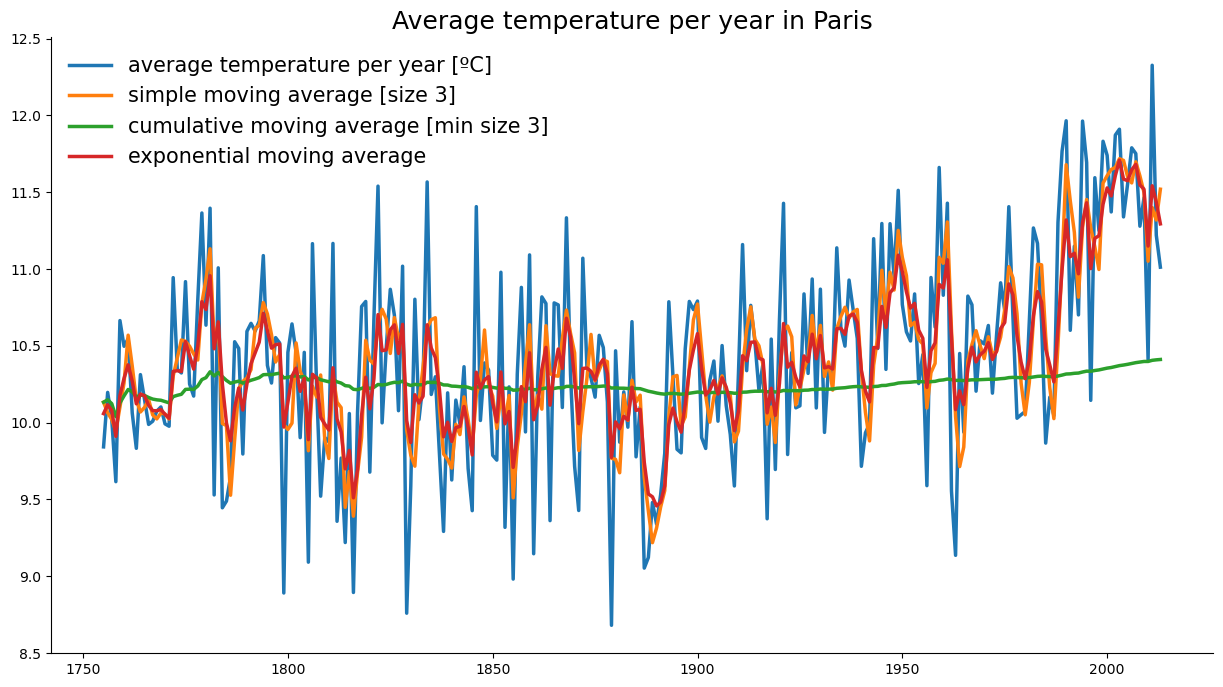

In [8]:
paris_temperature = DataAnalysis(temp_paris)
paris_temperature.plot()

On remarque que dans ce cas, la moyenne mobile cumulative n'est pas très adaptée alors que les 2 autres méthodes sont bien meilleures.

![image alt >](Images/numgrade.png)
## Résumé

Vous pouvez calculer facilement les moyennes glissantes avec pandas :

- s'appuyer sur *rolling()* pour la moyenne mobile simple,

- s'appuyer sur *expanding()* pour la moyenne mobile cumulative,

- s'appuyer sur *ewm()* pour la moyenne mobile exponentielle.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Ajouter des dimensions aux Series et DataFrames

Lorsque l'on souhaite travailler avec pandas sur des données qui ont plus de 2 dimensions, il faudra utiliser l'indexation hiérarchique (hierarchical indexing ou multi-indexing en anglais) afin d'incorporer plusieurs niveaux d'indexation.

NOTE : 

- Il existait des objets pandas Panel et Panel4D qui sont maintenant dépréciés.

- Une autre solution pour des tableaux à plusieurs dimensions est [xarray](http://xarray.pydata.org/en/stable/).

![image alt >](Images/numgrade.png)
## Séries multi-indexées

Nous pourrions imaginer faire de l'indexation hiérarchique avec des tuples, par exemple :

In [1]:
import numpy as np
import pandas as pd

In [2]:
index = [("Ain", 2000), ("Ain", 2019),
             ("Aisne", 2000), ("Aisne", 2019),
             ("Paris", 2000), ("Paris", 2019)]
             
populations = [521103, 653688, 
                      536260, 528016, 
                      2129700, 2140500]

Pour ensuite construire cette série :

In [3]:
pd.Series(populations, index=index)

(Ain, 2000)       521103
(Ain, 2019)       653688
(Aisne, 2000)     536260
(Aisne, 2019)     528016
(Paris, 2000)    2129700
(Paris, 2019)    2140500
dtype: int64

Mais nous perdrions alors tous les bénéfices de la sélection avancée des données avec pandas tant sur le plan de la simplicité que de l'efficacité (par exemple, pour extraire les données correspondant aux années 2000, il faudrait par exemple passer par une compréhension de liste). Pour le multi-indexing, pandas possède le type MultiIndex qui va s'avérer être un atout précieux pour ce genre d'indexation.

![image alt >](Images/numgrade.png)
### MultiIndex

Nous pourrons construire le multi-index à partir de la liste de tuples précédente :

In [4]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([(  'Ain', 2000),
            (  'Ain', 2019),
            ('Aisne', 2000),
            ('Aisne', 2019),
            ('Paris', 2000),
            ('Paris', 2019)],
           )

On retrouve les différents niveaux d'indexation ainsi que l'encodage des niveaux avec la partie codes.

Ensuite, il suffira de construire notre série avec ce MultiIndex :

In [5]:
population = pd.Series(populations, index=index)
population

Ain    2000     521103
       2019     653688
Aisne  2000     536260
       2019     528016
Paris  2000    2129700
       2019    2140500
dtype: int64

Et maintenant, pour indexer les années 2000, nous voulons toutes les données pour le premier index et 2000 pour le second index. Il suffira donc d'écrire :

In [6]:
population.loc[:, 2000]    # or population[:, 2000]

Ain       521103
Aisne     536260
Paris    2129700
dtype: int64

![image alt >](Images/numgrade.png)
### Des dimensions supplémentaires grâce à MultiIndex

Notre série multi-indexée précédente aurait très bien pu être stocké dans un simple DataFrame. Cette opération de transformation d'une série multi-indexée vers un DataFrame est d'ailleurs prévue :

In [7]:
pop_df = population.unstack()
pop_df

,2000,2019
Ain,521103,653688
Aisne,536260,528016
Paris,2129700,2140500


Naturellement, la méthode stack() va effectuer l'opération inverse :

In [8]:
pop_df.stack()

Ain    2000     521103
       2019     653688
Aisne  2000     536260
       2019     528016
Paris  2000    2129700
       2019    2140500
dtype: int64

![image alt >](Images/numgrade.png)
Cependant, tout l'intérêt sera d'ajouter d'autres niveaux d'indexation (chaque niveau supplémentaire permet d'ajouter une dimension). Le multi-indexing précédent nous a permis de représenter des données à 2 dimensions à l'intérieur d'une *Series* à une dimension. Nous pourrions encore rajouter des niveaux pour représenter des données à 3 ou plus de dimensions dans une *Series* ou un *DataFrame*.

Exemple avec un *DataFrame* en partant de la *Series* (population) précédente :

In [10]:
departments = pd.DataFrame(
    {
        'population': population,
        'unemployment': [
            3.9, 6.2,
            10.3, 12.2,
            7.5, 6.7
        ]
    }
)
departments

population  unemployment
Ain   2000      521103           3.9
      2019      653688           6.2
Aisne 2000      536260          10.3
      2019      528016          12.2
Paris 2000     2129700           7.5
      2019     2140500           6.7

![image alt >](Images/numgrade.png)
## Méthodes pour créer des tableaux multi-indexés

Pour construire un DataFrame multi-indexé, le plus simple est de passer une liste avec 2 ou + listes d'indices. Exemple :

In [11]:
df = pd.DataFrame(
    np.random.rand(4, 2),
    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
    columns=['data1', 'data2']
)
df

data1     data2
a 1  0.120462  0.360736
  2  0.071696  0.637673
b 1  0.322128  0.590137
  2  0.192048  0.565150

Et on a bien un objet MultiIndex pour les indices :

In [12]:
df.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Nous avions vu que nous pouvions créer des Series et des DataFrames à partir de dictionnaires. En utilisant des tuples comme clefs, nous allons pouvoir créer des Series / DataFrames multi-indexés. Exemple :

In [13]:
data = {
    ("Ain", 2000): 521103, 
    ("Ain", 2019): 653688,
    ("Aisne", 2000): 536260, 
    ("Aisne", 2019): 528016,
    ("Paris", 2000): 2129700, 
    ("Paris", 2019): 2140500,
}
pd.Series(data) 

Ain    2000     521103
       2019     653688
Aisne  2000     536260
       2019     528016
Paris  2000    2129700
       2019    2140500
dtype: int64

![image alt >](Images/numgrade.png)
## Construire un MultiIndex

Il pourra être intéressant aussi de construire directement l'objet MultiIndex. Plusieurs méthodes existent :

   - Avec une liste de sous-listes (comme précédemment pour le DataFrame) :
   

In [14]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

![image alt >](Images/numgrade.png)
   - Avec une liste de tuples (en précisant les multi-indices pour chaque point) : 

In [15]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

![image alt >](Images/numgrade.png)
   - En utilisant un produit cartésien :

In [16]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

![image alt >](Images/numgrade.png)

   - À partir d'un DataFrame :

In [17]:
df = pd.DataFrame([['a', 'a', 'b', 'b'], [1,2,1,2]]).T
df

,0,1
0,a,1
1,a,2
2,b,1
3,b,2


In [18]:
index = pd.MultiIndex.from_frame(df)
index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=[0, 1])

Vous pouvez remarquer le paramètre names ici qui correspond aux noms des colonnes et qui va représenter un nom pour chaque niveau d'indice (voir plus loin).

  
  - Ou encore directement avec l'encodage interne de MultiIndex. Il faudra passer les paramètres "levels" (une liste de listes contenant les indices présents dans chaque niveau) et "codes" (une liste de listes qui référence les indices du paramètre "levels" et qui correspond à leur position sur chaque niveau) :
  

In [19]:
pd.MultiIndex(
    levels=[['a', 'b'], [1, 2]],
    codes=[[0, 0, 1, 1], [0, 1, 0, 1]]
)

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

L'objet MultiIndex pourra être passé au paramètre "index" au moment de la création d'une Series ou d'un DataFrame.

![image alt >](Images/numgrade.png)
### Des noms pour les indices

Il est parfois intéressant de nommer les indices surtout quand il y a plusieurs niveaux pour se rappeler de la signification de chaque niveau d'indices, nous verrons aussi leur intérêt lorsque nous aborderons la partie sur l'agrégation. Nous avons vu précédemment qu'il y avait un paramètre names qui permet de nommer les indices des différents niveaux, il est aussi possible de le faire directement avec l'attribut "names" de "index" :

In [20]:
population    # reminder : we had this Series

Ain    2000     521103
       2019     653688
Aisne  2000     536260
       2019     528016
Paris  2000    2129700
       2019    2140500
dtype: int64

In [21]:
population.index.names = ['departments', 'year']
population

departments  year
Ain          2000     521103
             2019     653688
Aisne        2000     536260
             2019     528016
Paris        2000    2129700
             2019    2140500
dtype: int64

![image alt >](Images/numgrade.png)
### MultiIndex pour les colonnes

À l'instar des lignes, les colonnes pourront aussi avoir plusieurs niveaux d'indices. Exemple :

In [25]:
index = pd.MultiIndex.from_product([[2018], range(1, 13)])

columns = pd.MultiIndex.from_product(
    [
        ['Paris', 'Brest', 'Marseille', 'Strasbourg'], 
        ['mean temperature [°C]', 'pluviometry [mm]'],
    ]
)

In [26]:
# load NumPy data - Sources : https://www.historique-meteo.net/france/
data = np.load('data/weather_data.npy')

In [27]:
weather_data = pd.DataFrame(data, index=index, columns=columns)
weather_data.head()

Paris                                  Brest  \
       mean temperature [°C] pluviometry [mm] mean temperature [°C]   
2018 1                   8.2             63.3                  10.3   
     2                   3.4             26.9                   7.1   
     3                   9.2             48.4                   9.4   
     4                  16.6             19.7                  13.9   
     5                  20.2             24.7                  16.4   

                                    Marseille                   \
       pluviometry [mm] mean temperature [°C] pluviometry [mm]   
2018 1             59.6                  12.7             38.4   
     2             25.4                   8.2             28.6   
     3             52.1                  12.7             40.7   
     4             17.1                  18.3             54.9   
     5             19.3                  20.5             68.1   

                  Strasbourg                   
       mean temperature [°C] pluviometry [mm]  
2018 1                   7.5             75.1  
     2                   2.2             19.4  
     3                   8.3             41.8  
     4                  17.2             21.1  
     5                  20.3             28.8

Nous avons des multi-index pour les lignes et les colonnes. Nous aurions pu aussi préciser des noms pour les différents niveaux :

In [28]:
index = pd.MultiIndex.from_product(
    [[2018], range(1, 13)],
    names=['year', 'month']
)

columns = pd.MultiIndex.from_product(
    [
        ['Paris', 'Brest', 'Marseille', 'Strasbourg'], 
        ['mean temperature [°C]', 'pluviometry [mm]']
    ],
    names=['city', 'measurement'],
)

In [29]:
weather_data = pd.DataFrame(data, index=index, columns=columns)
weather_data.head() 

city                        Paris                                  Brest  \
measurement mean temperature [°C] pluviometry [mm] mean temperature [°C]   
year month                                                                 
2018 1                        8.2             63.3                  10.3   
     2                        3.4             26.9                   7.1   
     3                        9.2             48.4                   9.4   
     4                       16.6             19.7                  13.9   
     5                       20.2             24.7                  16.4   

city                                     Marseille                   \
measurement pluviometry [mm] mean temperature [°C] pluviometry [mm]   
year month                                                            
2018 1                  59.6                  12.7             38.4   
     2                  25.4                   8.2             28.6   
     3                  52.1                  12.7             40.7   
     4                  17.1                  18.3             54.9   
     5                  19.3                  20.5             68.1   

city                   Strasbourg                   
measurement mean temperature [°C] pluviometry [mm]  
year month                                          
2018 1                        7.5             75.1  
     2                        2.2             19.4  
     3                        8.3             41.8  
     4                       17.2             21.1  
     5                       20.3             28.8

![image alt >](Images/numgrade.png)
## Résumé

- Pour ajouter des dimensions, nous utiliserons des MultiIndex.

- De nombreuses méthodes existent pour créer ces MultiIndex.

- Nous pourrons nommer ces MultiIndex, ce qui facilitera leur manipulation.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Manipuler les MultiIndex

## Indexation et slicing, réarranger les indices, agrégation

![image alt >](Images/numgrade.png)
## Indexation et slicing

### Cas des Series multi-indexées

Partons de notre Series précédente :

In [1]:
import numpy as np
import pandas as pd

index = pd.MultiIndex.from_tuples(
    [
        ("Ain", 2000), 
        ("Ain", 2019),
        ("Aisne", 2000), 
        ("Aisne", 2019),
        ("Paris", 2000), 
        ("Paris", 2019),
    ]
)
             
populations = [
    521103, 
    653688, 
    536260, 
    528016, 
    2129700, 
    2140500
]

population = pd.Series(populations, index=index)
population.index.names = ['departments', 'year']

population

departments  year
Ain          2000     521103
             2019     653688
Aisne        2000     536260
             2019     528016
Paris        2000    2129700
             2019    2140500
dtype: int64

![image alt >](Images/numgrade.png)
Pour indexer un seul élément, il suffira d'appeler les indices séparés par des virgules :

In [2]:
population['Ain', 2000]   # or population.loc['Ain', 2000]

np.int64(521103)

L'indexation avec iloc fonctionne différemment puisque iloc considérera qu'il n'y a qu'une seule dimension, donc la 1ère valeur serait :

In [3]:
population.iloc[0]

np.int64(521103)

![image alt >](Images/numgrade.png)
Nous pourrons faire aussi de l'indexation partielle, en appelant juste le premier niveau d'indice. Le résultat sera une Series avec les sous indices :

In [4]:
population['Ain']   # or population.loc['Ain']

year
2000    521103
2019    653688
dtype: int64

![image alt >](Images/numgrade.png)
Si les multi-indices sont classés (sinon, cela retournera une erreur), il sera possible de faire du slicing :

In [5]:
population['Ain': 'Aisne']    # or population.loc['Ain': 'Aisne']

departments  year
Ain          2000    521103
             2019    653688
Aisne        2000    536260
             2019    528016
dtype: int64

![image alt >](Images/numgrade.png)
Nous pouvons aussi faire du slicing sur les niveaux inférieurs :

In [6]:
population[:, 2000]    # population.loc[:, 2000]

departments
Ain       521103
Aisne     536260
Paris    2129700
dtype: int64

![image alt >](Images/numgrade.png)
Nous pouvons aussi faire du slicing sur les 2 niveaux :

In [7]:
population.loc['Ain':'Aisne', 2000:2019]

departments  year
Ain          2000    521103
             2019    653688
Aisne        2000    536260
             2019    528016
dtype: int64

![image alt >](Images/numgrade.png)
Il sera aussi possible d'utiliser les masques booléens :

In [8]:
population[population>600_000]

departments  year
Ain          2019     653688
Paris        2000    2129700
             2019    2140500
dtype: int64

Ou encore l'indexation avancée :

In [9]:
population[['Ain', 'Paris']]

departments  year
Ain          2000     521103
             2019     653688
Paris        2000    2129700
             2019    2140500
dtype: int64

![image alt >](Images/numgrade.png)
### Cas des DataFrames multi-indexées

Démarrons de ce DataFrame :

In [10]:
weather_df = pd.read_pickle("data/weather_data_2017-2018.pd")
weather_df  # source: https://www.historique-meteo.net/france/

city                        Paris                                  Brest  \
measurement mean temperature [°C] pluviometry [mm] mean temperature [°C]   
year month                                                                 
2017 1                        3.8             49.4                   8.7   
     3                       12.4             33.1                  12.1   
     5                       19.0             40.5                  17.0   
2018 1                        8.2             63.3                  10.3   
     3                        9.2             48.4                   9.4   
     5                       20.2             24.7                  16.4   

city                                     Marseille                   \
measurement pluviometry [mm] mean temperature [°C] pluviometry [mm]   
year month                                                            
2017 1                  75.8                   9.5             46.9   
     3                  23.8                  15.1             35.0   
     5                  31.1                  19.6             26.4   
2018 1                  59.6                  12.7             38.4   
     3                  52.1                  12.7             40.7   
     5                  19.3                  20.5             68.1   

city                   Strasbourg                   
measurement mean temperature [°C] pluviometry [mm]  
year month                                          
2017 1                        0.9             39.4  
     3                       12.4             32.7  
     5                       19.0             58.9  
2018 1                        7.5             75.1  
     3                        8.3             41.8  
     5                       20.3             28.8

![image alt >](Images/numgrade.png)
Lorsque l'on travaille avec les DataFrames, sans les indexeurs loc ou iloc, nous travaillons d'abord sur les colonnes. La syntaxe pour les multi-indices vue pour les Series va s'appliquer ici pour les colonnes :

In [11]:
weather_df['Brest']    # data for the city Brest

measurement  mean temperature [°C]  pluviometry [mm]
year month                                          
2017 1                         8.7              75.8
     3                        12.1              23.8
     5                        17.0              31.1
2018 1                        10.3              59.6
     3                         9.4              52.1
     5                        16.4              19.3

In [12]:
weather_df['Brest', 'pluviometry [mm]']  

year  month
2017  1        75.8
      3        23.8
      5        31.1
2018  1        59.6
      3        52.1
      5        19.3
Name: (Brest, pluviometry [mm]), dtype: float64

![image alt >](Images/numgrade.png)
Bien entendu, nous pourrons aussi utiliser les indexeurs :

Avec iloc, nous allons travailler comme si nous avions un DataFrame à 2 dimensions (sans vraiment tenir compte des multi-indices) :

In [13]:
weather_df.iloc[:3, :2]

city                        Paris                 
measurement mean temperature [°C] pluviometry [mm]
year month                                        
2017 1                        3.8             49.4
     3                       12.4             33.1
     5                       19.0             40.5

![image alt >](Images/numgrade.png)
Par contre avec loc, on pourra travailler sur les multi-indices :

   - Travail sur le premier niveau d'indices :

In [14]:
weather_df.loc[2017, 'Paris']  # working with 1st level [index, column]

measurement,mean temperature [°C],pluviometry [mm]
month,,
1,3.8,49.4
3,12.4,33.1
5,19.0,40.5


In [15]:
weather_df.loc[2017:2018, ['Paris', 'Brest']]  # working with 1st level

city                        Paris                                  Brest  \
measurement mean temperature [°C] pluviometry [mm] mean temperature [°C]   
year month                                                                 
2017 1                        3.8             49.4                   8.7   
     3                       12.4             33.1                  12.1   
     5                       19.0             40.5                  17.0   
2018 1                        8.2             63.3                  10.3   
     3                        9.2             48.4                   9.4   
     5                       20.2             24.7                  16.4   

city                          
measurement pluviometry [mm]  
year month                    
2017 1                  75.8  
     3                  23.8  
     5                  31.1  
2018 1                  59.6  
     3                  52.1  
     5                  19.3

![image alt >](Images/numgrade.png)
   - Pour travailler sur plusieurs niveaux d'indices, nous pourrons utiliser des tuples ou des slices suivant le besoin :

In [16]:
weather_df.loc[(2017, 3):(2018, 1), 'Brest']   # slicing with tuples corresponding to the 2 levels of index

measurement  mean temperature [°C]  pluviometry [mm]
year month                                          
2017 3                        12.1              23.8
     5                        17.0              31.1
2018 1                        10.3              59.6

In [17]:
weather_df.loc[(slice(2017, 2018), 1), :]    # slicing using the slice object - extract data for January in 2017 and 2018

city                        Paris                                  Brest  \
measurement mean temperature [°C] pluviometry [mm] mean temperature [°C]   
year month                                                                 
2017 1                        3.8             49.4                   8.7   
2018 1                        8.2             63.3                  10.3   

city                                     Marseille                   \
measurement pluviometry [mm] mean temperature [°C] pluviometry [mm]   
year month                                                            
2017 1                  75.8                   9.5             46.9   
2018 1                  59.6                  12.7             38.4   

city                   Strasbourg                   
measurement mean temperature [°C] pluviometry [mm]  
year month                                          
2017 1                        0.9             39.4  
2018 1                        7.5             75.1

![image alt >](Images/numgrade.png)
   - Mais quand on va avoir besoin de faire du slicing sur plusieurs niveaux, il va être bien plus commode et intuitif d'utiliser l'objet IndexSlice :

In [19]:
idx = pd.IndexSlice           # create IndexSlice object
weather_df.loc[
    idx[:, 1],    # slicing for lines
    idx[['Paris', 'Brest'], 'pluviometry [mm]'],   #slicing for columns
]

,city,Paris,Brest
,measurement,pluviometry [mm],pluviometry [mm]
year,month,,
2017,1,49.4,75.8
2018,1,63.3,59.6


![image alt >](Images/numgrade.png)
### Réarrangement avec MultiIndex

Il est parfois utile de réarranger les données d'un tableau multi-indexé (tout en préservant toute l'information du jeu de données) pour faciliter l'analyse des données. 

Nous avons vu qu'il existe les méthodes *stack()* et *unstack()* : *unstack()* va convertir une Series multi-indexée en DataFrame et *stack()* va réaliser l'opération inverse. Exemple :

In [20]:
population     # Series

departments  year
Ain          2000     521103
             2019     653688
Aisne        2000     536260
             2019     528016
Paris        2000    2129700
             2019    2140500
dtype: int64

In [21]:
population.unstack()  # level year is now in columns

year,2000,2019
departments,,
Ain,521103,653688
Aisne,536260,528016
Paris,2129700,2140500


In [22]:
population.unstack().stack()

departments  year
Ain          2000     521103
             2019     653688
Aisne        2000     536260
             2019     528016
Paris        2000    2129700
             2019    2140500
dtype: int64

Il est aussi possible de préciser une option level avec laquelle nous allons préciser quel niveau d'indice va être transformé en colonne :

In [23]:
population.unstack(level=0)  
# or if level is named, we can use the level name
#population.unstack(level='departments')

departments,Ain,Aisne,Paris
year,,,
2000,521103,536260,2129700
2019,653688,528016,2140500


![image alt >](Images/numgrade.png)
### Réarranger les indices

La méthode *reset_index()* va nous permettre de mettre tous les indices des lignes en indices des colonnes :

In [24]:
population   # starting from Series population

departments  year
Ain          2000     521103
             2019     653688
Aisne        2000     536260
             2019     528016
Paris        2000    2129700
             2019    2140500
dtype: int64

In [25]:
population.reset_index()

,departments,year,0
0,Ain,2000,521103
1,Ain,2019,653688
2,Aisne,2000,536260
3,Aisne,2019,528016
4,Paris,2000,2129700
5,Paris,2019,2140500


Les indices des lignes (qui étaient nommés) ont été placés en colonnes. Plutôt que d'avoir un nom de colonne par défaut égal à 0, il sera aussi possible de préciser avec l'option name, le nom de cette colonne : 

In [26]:
population_no_index = population.reset_index(name='population')
population_no_index

,departments,year,population
0,Ain,2000,521103
1,Ain,2019,653688
2,Aisne,2000,536260
3,Aisne,2019,528016
4,Paris,2000,2129700
5,Paris,2019,2140500


![image alt >](Images/numgrade.png)
Méthode set_index() : Lorsque l'on récupère des données, il arrive souvent de les récupérer sous la forme que l'on vient de voir, c'est à dire sans indices pour les lignes. Nous allons alors réaliser l'opération inverse, à savoir construire un DataFrame multi-indexé en précisant les noms de colonnes qui iront en indices des lignes : 

In [27]:
population_df = population_no_index.set_index(['departments', 'year'])
population_df

population
departments year            
Ain         2000      521103
            2019      653688
Aisne       2000      536260
            2019      528016
Paris       2000     2129700
            2019     2140500

Note : pour obtenir exactement la même Series qu'avant, il est possible d'utiliser la méthode *squeeze()* : population_df.squeeze())

In [28]:
population_df.squeeze()

departments  year
Ain          2000     521103
             2019     653688
Aisne        2000     536260
             2019     528016
Paris        2000    2129700
             2019    2140500
Name: population, dtype: int64

![image alt >](Images/numgrade.png)
### Agrégation et multi-indices

Nous avions vu qu'il existe des méthodes d'agrégation de données telles que par exemple *sum()*, *mean()* ou *max()*. Lorsque l'on va travailler avec des multi-indices, nous pourrons utiliser le paramètre "level" pour préciser à quel niveau les données vont être agréger :

In [29]:
weather_df  # DataFrame

city                        Paris                                  Brest  \
measurement mean temperature [°C] pluviometry [mm] mean temperature [°C]   
year month                                                                 
2017 1                        3.8             49.4                   8.7   
     3                       12.4             33.1                  12.1   
     5                       19.0             40.5                  17.0   
2018 1                        8.2             63.3                  10.3   
     3                        9.2             48.4                   9.4   
     5                       20.2             24.7                  16.4   

city                                     Marseille                   \
measurement pluviometry [mm] mean temperature [°C] pluviometry [mm]   
year month                                                            
2017 1                  75.8                   9.5             46.9   
     3                  23.8                  15.1             35.0   
     5                  31.1                  19.6             26.4   
2018 1                  59.6                  12.7             38.4   
     3                  52.1                  12.7             40.7   
     5                  19.3                  20.5             68.1   

city                   Strasbourg                   
measurement mean temperature [°C] pluviometry [mm]  
year month                                          
2017 1                        0.9             39.4  
     3                       12.4             32.7  
     5                       19.0             58.9  
2018 1                        7.5             75.1  
     3                        8.3             41.8  
     5                       20.3             28.8

Si nous souhaitons moyenner par année, nous pourrons écrire :

In [30]:
weather_df.groupby(level='year').mean()

city                        Paris                                  Brest  \
measurement mean temperature [°C] pluviometry [mm] mean temperature [°C]   
year                                                                       
2017                    11.733333        41.000000             12.600000   
2018                    12.533333        45.466667             12.033333   

city                                     Marseille                   \
measurement pluviometry [mm] mean temperature [°C] pluviometry [mm]   
year                                                                  
2017               43.566667             14.733333        36.100000   
2018               43.666667             15.300000        49.066667   

city                   Strasbourg                   
measurement mean temperature [°C] pluviometry [mm]  
year                                                
2017                    10.766667        43.666667  
2018                    12.033333        48.566667

Par défaut, l'agréation se fait sur les indices des lignes (notez de nouveau l'intérêt de nommer les indices).

Pour agréger au niveau des indices des colonnes, il était possible de préciser l'option axis='columns' (weather_df.groupby(axis='columns', level='measurement').mean()) mais cette option est maintenant dépréciée et il est maintenant recommandé de passer par la transposé :

In [33]:
weather_df.T.groupby(level='measurement').mean().T

measurement  mean temperature [°C]  pluviometry [mm]
year month                                          
2017 1                       5.725            52.875
     3                      13.000            31.150
     5                      18.650            39.225
2018 1                       9.675            59.100
     3                       9.900            45.750
     5                      19.350            35.225

Dans l'exemple précédent, nous avons effectué une deuxième transposé pour garder les "mean temperature" et "pluviometry" en indices de colonne.

![image alt >](Images/numgrade.png)
## Résumé

- Indexation et slicing : il existe plusieurs notations pour manipuler les MultiIndex. Pour des manipulation complexes, l'objet *pd.IndexSlice* sera très puissant.

- Réarrangement des indices avec les méthodes *stack*, *unstack*, *reset_index* et *set_index*.

- Méthodes d'agrégation avec MultiIndex : pensez à l'option *level* avec groupby.

![image alt >](Images/numgrade.png)

### Exercices

**Objectifs pédagogiques**

- Créer des objets MultiIndex.

- Manipuler des DataFrames multi-indexés.

- Sélectionner des données dans des DataFrames multi-indexés.

- Réaliser des calculs à partir de données dans des DataFrames multi-indexés.

**Énoncés**

À partir des données de l'INSEE :

À cette URL https://github.com/numgrade/data_analysis_with_python/tree/master/data, téléchargez ces 2 fichiers : 

Fichier excel : estim-pop-nreg-sexe-gca-1975-2019.xls (lire avec *pd.read_excel()*)

Fichier pandas : unemployment.pd (lire avec *pd.read_pickle()*)

**Partie optionnelle (difficulté : ⭐⭐⭐)**

- Créez un DataFrame avec 3 niveaux d'indices pour les lignes (region / year / trimester) et 2 colonnes (population / unemployment)

    - La première étape va consister à lire les 2 fichiers, les transformer pour pouvoir les concaténer. On s'intéressera uniquement aux données de la France métropolitaine.
        
    - Nous allons considérer que la population est identique pour les 4 trimestres de l'année, il faudra donc propager les valeurs pour la colonne population sur chaque trimestre.

    - Nommez les indices des lignes (region / year / trimester)

**Débuter à partir du fichier concat_df.pd (qui correspond au point précédent) (difficulté : ⭐⭐⭐)**

- Passez l'indice ligne "region" en colonne (les colonnes seront alors aussi multi-indexés - 1er niveau : population et unemployment - 2ème niveau : les régions)

- Calculez la moyenne par année pour la colonne unemployment (=taux de chômage par année pour chaque région).

- Extraire les données de la colonne unemployment / Bretagne lorsque "unemployment" est inférieur à 7.

- Calculer la variation de population totale entre 1982 et 2018.

<sub>Sources :</sub>

<sub>- population : https://www.insee.fr/fr/statistiques/1893198 - estim-pop-nreg-sexe-gca-1975-2019.xls</sub>

<sub>- taux de chômage : https://www.insee.fr/fr/statistiques/series/102760732#</sub>

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Travailler avec les chaînes de caractères

![image alt >](Images/numgrade.png)
Lorsque l'on récupère des données, une étape souvent cruciale consiste à nettoyer les données, et pour cela les opérations sur les chaînes de caractères seront parfois très utiles. 
pandas vient avec tout un ensemble d'opérations vectorisées sur les chaînes de caractères (ce qui constitue une fonctionnalité supplémentaire par rapport à NumPy). Nous aurons donc à disposition des opérations vectorisées et qui vont gérer les données manquantes.

Pour accéder aux méthodes de chaînes de caractères, nous allons passer par l'attribut str des objets Series / DataFrames ou index / columns :

In [1]:
import pandas as pd

In [2]:
data = ['Ain', 'aisne', 'Paris', None, 'Allier', 'ALPES de Haute Provence']
dep_names = pd.Series(data)
dep_names

0                        Ain
1                      aisne
2                      Paris
3                       None
4                     Allier
5    ALPES de Haute Provence
dtype: object

In [3]:
dep_names.str.lower()

0                        ain
1                      aisne
2                      paris
3                       None
4                     allier
5    alpes de haute provence
dtype: object

Vous pouvez constater que pandas a bien géré le None et a appliqué la méthode lower() à l'ensemble des données.

![image alt >](Images/numgrade.png)
## Les méthodes de chaînes de caractères

Nous allons retrouver la plupart des méthodes des chaînes de caractères de Python :

In [4]:
print(dir(dep_names.str))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_data', '_doc_args', '_freeze', '_get_series_list', '_index', '_inferred_dtype', '_is_categorical', '_is_string', '_name', '_orig', '_parent', '_validate', '_wrap_result', 'capitalize', 'casefold', 'cat', 'center', 'contains', 'count', 'decode', 'encode', 'endswith', 'extract', 'extractall', 'find', 'findall', 'fullmatch', 'get', 'get_dummies', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'islower', 'isnumeric', 'isspace', 'istitle', 'isupper', 'join', 'len', 'ljust', 'lower', 'lstrip', 'match', 'normalize', 'pad', 'partition', 'removeprefix', 'removesuffix', 'rep

Dans cette liste, vous trouverez des méthodes qui accepte des expressions régulières mais aussi directement des méthodes du module **re** (module pour les expressions régulières) :

| Méthode	|  Description |
|-------------|--------------|
| match()    | appel re.match() et retourne un booléen |
| extract()   | appel re.match() et retourne les groupes correspondants comme chaîne de caractères |
| findall()    | appel re.findall() |
| replace()	 | remplace les motifs recherchés |
| contains() | appel re.search() retourne un booléen |
| count()     | compte le nombre d'occurrences d'un motif  |
| split()      | équivalent à str.split() mais accepte des expressions régulières |
| rsplit()     | équivalent à str.rsplit() mais accepte des expressions régulières  |

Note sur la différence match / contains : match va chercher le motif en démarrant du début de la chaîne de caractère alors que contains va chercher le motif partout dans la chaîne de caractères.

rsplit() : split en partant de la fin de la chaîne de caractères.

![image alt >](Images/numgrade.png)

Quelques exemples avec des expressions régulières simples :

In [5]:
dep_names.str.match(r'[Aa]i.+')

0     True
1     True
2    False
3     None
4    False
5    False
dtype: object

In [6]:
dep_names.str.extract(r'([Aa]i.+)')

,0
0,Ain
1,aisne
2,NaN
3,NaN
4,NaN
5,NaN


In [7]:
dep_names.str.findall(r'([Aa])')

0       [A]
1       [a]
2       [a]
3      None
4       [A]
5    [A, a]
dtype: object

In [8]:
dep_names.str.replace(r' ', '-')

0                        Ain
1                      aisne
2                      Paris
3                       None
4                     Allier
5    ALPES-de-Haute-Provence
dtype: object

In [9]:
dep_names.str.contains(r'[Aa].+')   # note : dep_names.str.match(r'[A,a].+') would return a different result - match starts from the beginning

0    True
1    True
2    True
3    None
4    True
5    True
dtype: object

In [10]:
dep_names.str.count(r'[Aa]') 

0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
5    2.0
dtype: float64

![image alt >](Images/numgrade.png)
Il existe encore quelques autres méthodes plus spécifiques, n'hésitez pas aller voir la documentation qui est souvent accompagnée d'exemples.

Notez qu'il est également possible de faire de l'indexation et du slicing directement avec l'attribut str :

In [11]:
dep_names.str[0]

0       A
1       a
2       P
3    None
4       A
5       A
dtype: object

In [12]:
dep_names.str[-3:]

0     Ain
1     sne
2     ris
3    None
4     ier
5     nce
dtype: object

Notez qu'il est aussi possible d'enchaîner les méthodes, pour cela, il faudra réutiliser l'attribut str :

In [13]:
dep_names.str[-3:].str.capitalize()


0     Ain
1     Sne
2     Ris
3    None
4     Ier
5     Nce
dtype: object

![image alt >](Images/numgrade.png)
## Résumé

Avec pandas, vous pourrez faire un traitement avancé des chaînes de caractères :

- les méthodes de chaînes de caractères sont accessibles en passant par *str*,

- on trouve des méthodes de chaînes de caractères Python,

- on trouve également des méthodes qui permettent de travailler directement avec des expressions régulières.

![image alt >](Images/numgrade.png)

### Exercices (difficulté : ⭐⭐⭐)

**Objectifs pédagogiques**

- Travailler les chaînes de caractères avec pandas.

- Transformer des données en utilsant des méthodes de chaînes de caractères.

- Sélectionner des données avec des méthodes de chaînes de caractères.

**Énoncés**

- Question optionnelle : créer la Series "unemployment.pd" que nous avons utilisé dans l'exercice précédent à partir du fichier csv "chomage_valeurs_trimestrielles.csv" qui se trouve à l'URL https://bit.ly/2Htijxq.

- À partir du DataFrame de l'exercice précédent (unemployment_population.pd), mettre en lettres capitales les noms des régions. Note : vous pouvez utiliser les méthodes *get_level_values* et/ou *set_levels* sur l'objet "MultiIndex" ou la méthode rename.

- Extraire la population pour les régions commençant par la lettre "P". Note : vous pouvez utiliser la méthode get_level_values.

- Extraire les données pour les régions contenant la lettre "S". Note : vous pouvez utiliser la méthode get_level_values.

- Transformer les noms des régions : extraire que les 3 premières lettres.

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Traiter des données temporelles

![image alt >](Images/numgrade.png)
Python possède des modules tels que datetime ou dateutil qui permettent de travailler sur les dates mais sur de grandes quantités de données, les performances ne seront pas bonnes. NumPy possède un type de données datetime64 qui permet d'être performant au niveau temps de calcul, mais nous n'avons pas la flexibilité des modules précédents.

pandas va combiner le meilleur des deux mondes avec l'objet Timestamp. À partir de ces objets Timestamp, pandas pourra construire des DatetimeIndex qui pourront nous servir à indexer des Series ou DataFrames.

Les 3 structures pour travailler avec les séries temporelles sont :

- Timestamp : un instant t dans le temps (horodatage). Essentiellement un équivalent de datetime mais basé sur numpy.datetime64. La structure d'indices associés est DatetimeIndex.

- Period : pour travailler sur des intervalles à fréquence fixe et basé également sur numpy.datetime64. La structure d'indices associée est PeriodIndex.

- Timedelta : pour les intervalles de temps (ou durée), il remplace datetime.timedelta et est basé sur numpy.datetime64. La structure d'indices associée est TimedeltaIndex.

Les structures les plus fondamentales seront probalement Timestamp et DatetimeIndex. Ces différentes classes peuvent être invoquées directement mais il sera plus courant de passer par la fonction to_datetime() qui permet d'interpréter un grand nombre de formats.

![image alt >](Images/numgrade.png)
## Créer des dates

Nous pourrons appeler directement la classe Timestamp :

In [3]:
import pandas as pd


pd.Timestamp('2019-07-04 15')

Timestamp('2019-07-04 15:00:00')

In [4]:
date = pd.Timestamp(2019, 7, 4, 15)
date

Timestamp('2019-07-04 15:00:00')

À partir d'un objet Timestamp, nous aurons accès à toute une série d'attributs ou de méthodes qui permettent d'extraire des informations :

In [5]:
print(dir(date))

['__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_creso', '_date_repr', '_from_dt64', '_from_value_and_reso', '_repr_base', '_round', '_time_repr', '_value', 'as_unit', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_

![image alt >](Images/numgrade.png)
La méthode to_datetime() permet de retourner différents objets en fonction de l'input :

  - sequence --> DateTimeIndex
    
  - Series / DataFrame --> Series de datetime64
    
  - scalaire / chaîne de caractères (une seule date) --> Timestamp

Nous allons voir quelques exemples, n'hésitez pas à aller voir la documentation pour voir toutes les possibilités. 

![image alt >](Images/numgrade.png)
    - À partir d'une liste :

In [6]:
pd.to_datetime([0, 1, 2], unit='D', origin=pd.Timestamp(2019, 7, 3))

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05'], dtype='datetime64[ns]', freq=None)

![image alt >](Images/numgrade.png)
     - À partir d'un DataFrame :

In [8]:
df = pd.DataFrame(
    {
        'year': [2018, 2019],
        'month': [7, 7],
        'day': [4, 4]
    }
)
pd.to_datetime(df)  # it works because the column are named year, month and day

0   2018-07-04
1   2019-07-04
dtype: datetime64[ns]

![image alt >](Images/numgrade.png)
    - À partir d'une chaîne de caractères :

In [9]:
date = pd.to_datetime('4th of July 2019 at 15:00')
date

Timestamp('2019-07-04 15:00:00')

![image alt >](Images/numgrade.png)
Liste des codes et leur signification :

| Code | Signification |
|-------|---------------|
| Y	     | Year	 |
| M	| Month	|
| W	| Week	|
| D	| Day	|
| h	| Hour	 |
| m	| Minute	|
| s	| Second	|
| ms | Millisecond	|
|us |	Microsecond	|
| ns | Nanosecond	|
| ps	| Picosecond	|
| fs | Femtosecond	|
| as | Attosecond |

![image alt >](Images/numgrade.png)
## Les durées avec timedelta

Il est possible de créer des durées avec la méthode to_timedelta. En fonction de l'input, on retournera un timedelta64 ou un tableau de timedelta64.

In [10]:
pd.to_timedelta('10 days 1:05:01.009')

Timedelta('10 days 01:05:01.009000')

In [11]:
import numpy as np


pd.to_timedelta(np.arange(3), 'D')

TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)

![image alt >](Images/numgrade.png)
Nous pourrons créer des intervalles de temps en combinant des objets Timestamp et Timedelta :

In [12]:
date

Timestamp('2019-07-04 15:00:00')

In [13]:
one_day = pd.to_timedelta('1 days')

In [14]:
# Timestamp + Timedelta -> new Timestamp
date + one_day

Timestamp('2019-07-05 15:00:00')

In [15]:
zero2two_days = pd.to_timedelta(np.arange(3), 'D')
zero2two_days

TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)

In [16]:
# Timestamp + TimedeltaIndex -> DatetimeIndex
date_idx = date + zero2two_days

date_idx

DatetimeIndex(['2019-07-04 15:00:00', '2019-07-05 15:00:00',
               '2019-07-06 15:00:00'],
              dtype='datetime64[ns]', freq=None)

In [17]:
# DatetimeIndex - Timestamp -> TimeDeltaIndex
date_idx - date_idx[0]

TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)

![image alt >](Images/numgrade.png)
## Série temporelle et indexation / slicing

Un des grands intérêts de travailler avec des Timestamp en indices sera de faire de l'indexation et du slicing :

In [18]:
# Create a DatetimeIndex
index = pd.DatetimeIndex(['2018-07-03', '2018-07-04', '2018-07-05', '2019-07-03', '2019-07-04', '2019-07-05'])

# Create a Series using the DatetineIndex
data = pd.Series(np.arange(6), index=index)
data 

2018-07-03    0
2018-07-04    1
2018-07-05    2
2019-07-03    3
2019-07-04    4
2019-07-05    5
dtype: int64

Bien entendu, il est toujours possible de faire de l'indexation (ou slicing) implicite :

In [19]:
data.iloc[0]  

np.int64(0)

![image alt >](Images/numgrade.png)
Mais évidemment, tout l'intérêt sera de profiter des Timestamp :

In [20]:
data['2019-07-03']

np.int64(3)

In [21]:
data['2018-07-04':'2019-07-03']

2018-07-04    1
2018-07-05    2
2019-07-03    3
dtype: int64

Nous pouvons aller plus loin dans l'extraction de données. Par exemple, si nous voulons que les données de l'année 2019 :

In [22]:
data['2019']

2019-07-03    3
2019-07-04    4
2019-07-05    5
dtype: int64

![image alt >](Images/numgrade.png)

## Série temporelle régulière

Pour créer des séries temporelles régulières, il existe la méthode date_range(). De même, pour les périodes, period_range() et pour les intervalles, il y aura la méthode timedelta_range().

La méthode date_range() prend une date de départ, une date de fin et éventuellement d'autres paramètres optionnels tel que freq (fréquence) ou periods (nombre de périodes à générer) : 

In [23]:
pd.date_range('2019-07-03', '2019-07-05')

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05'], dtype='datetime64[ns]', freq='D')

![image alt >](Images/numgrade.png)
Pour obtenir le même résultat, nous pourrions ne pas mettre une date de fin et préciser la paramètre periods :

In [24]:
pd.date_range('2019-07-03', periods=3)

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05'], dtype='datetime64[ns]', freq='D')

![image alt >](Images/numgrade.png)
La fréquence peut bien entendu être modifié avec l'option freq :

In [25]:
pd.date_range('2019-07-03 9:00:00', periods=8, freq='h')

DatetimeIndex(['2019-07-03 09:00:00', '2019-07-03 10:00:00',
               '2019-07-03 11:00:00', '2019-07-03 12:00:00',
               '2019-07-03 13:00:00', '2019-07-03 14:00:00',
               '2019-07-03 15:00:00', '2019-07-03 16:00:00'],
              dtype='datetime64[ns]', freq='h')

![image alt >](Images/numgrade.png)
Pour créer une séquence régulière, nous utiliserons period_range() :

In [26]:
pd.period_range('2019-07', periods=3, freq='M')

PeriodIndex(['2019-07', '2019-08', '2019-09'], dtype='period[M]')

![image alt >](Images/numgrade.png)
Pour créer une séquence de durée, nous pourrons nous appuyer sur timedelta_range() :

In [27]:
pd.timedelta_range(0, periods=8, freq='h')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00'],
               dtype='timedelta64[ns]', freq='h')

![image alt >](Images/numgrade.png)
Liste des codes que nous pouvons utiliser pour le paramètre freq :

| Code | Description |
|-------|-------------|
| D | Calendar day |
| B | Business day |
| W | Weekly |
| SME | Two weeks end|
| SMS | Two weeks start|
| ME | Month end |
| MS | Month start |
| BME | Business month end |
| BMS | Business month start |
| QE | Quarter end |
| QS | Quarter Start |
| BQE | Business quarter end |
| BQS | Business quarter start |
| YE | Year end |
| YS | Year end |
| BYE | Business year end |
| BYS | Business year end |
| h | Hours |
| BH | Business hours |
| min | Minutes |
| s | Seconds |
| ms | Milliseonds |
| us | Microseconds |
| ns | nanoseconds |


![image alt >](Images/numgrade.png)
Exemples :

In [28]:
pd.date_range('2019-07-03', periods=5, freq='B') # Business day B

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-08',
               '2019-07-09'],
              dtype='datetime64[ns]', freq='B')

In [29]:
pd.date_range('2019-07-03', periods=5, freq='SMS') # SMS = Two weeks start

DatetimeIndex(['2019-07-15', '2019-08-01', '2019-08-15', '2019-09-01',
               '2019-09-15'],
              dtype='datetime64[ns]', freq='SMS-15')

In [30]:
pd.date_range('2019-07', periods=5, freq='BME') # Business month end

DatetimeIndex(['2019-07-31', '2019-08-30', '2019-09-30', '2019-10-31',
               '2019-11-29'],
              dtype='datetime64[ns]', freq='BME')

Et nous pouvons aussi combiner les codes :

In [31]:
pd.date_range('2019-07-03 9:00', periods=5, freq='1h30min30s')

DatetimeIndex(['2019-07-03 09:00:00', '2019-07-03 10:30:30',
               '2019-07-03 12:01:00', '2019-07-03 13:31:30',
               '2019-07-03 15:02:00'],
              dtype='datetime64[ns]', freq='5430s')

![image alt >](Images/numgrade.png)
## Rééchantillonnage

pandas offre la possibilité de rééchantillonner avec les méthodes asfreq() et resample() :

- asfreq() : convertit une série temporelle à la fréquence spécifiée
  
- resample() : c'est l'équivalent de la méthode groupby() pour les séries temporelles, on aura donc un rééchantillonnage suivi d'une aggrégation

In [32]:
df = pd.read_pickle('data/paris_weather_2018.pd')
df.head()

,TEMPERATURE_NOON_C,PRECIP_TOTAL_DAY_MM
DATE,,
2018-01-01,8,0.1
2018-01-02,7,0.9
2018-01-03,11,1.7
2018-01-04,14,9.2
2018-01-05,10,0.6


![image alt >](Images/numgrade.png)
Augmenter la fréquence :

In [33]:
df.asfreq('0.5D').head()

,TEMPERATURE_NOON_C,PRECIP_TOTAL_DAY_MM
DATE,,
2018-01-01 00:00:00,8.0,0.1
2018-01-01 12:00:00,NaN,NaN
2018-01-02 00:00:00,7.0,0.9
2018-01-02 12:00:00,NaN,NaN
2018-01-03 00:00:00,11.0,1.7


Comme la fréquence est augmentée, forcément pandas complètera par des NaN. Il est possible d'ajouter des options pour propager les données :

In [34]:
df.asfreq('0.5D', method='ffill').head()

,TEMPERATURE_NOON_C,PRECIP_TOTAL_DAY_MM
DATE,,
2018-01-01 00:00:00,8,0.1
2018-01-01 12:00:00,8,0.1
2018-01-02 00:00:00,7,0.9
2018-01-02 12:00:00,7,0.9
2018-01-03 00:00:00,11,1.7


![image alt >](Images/numgrade.png)
Un exemple avec la méthode resample() avec laquelle nous voulons faire la moyenne par bloc de 5 jours :

In [36]:
df.resample('5D').mean().head()

,TEMPERATURE_NOON_C,PRECIP_TOTAL_DAY_MM
DATE,,
2018-01-01,10.0,2.50
2018-01-06,7.0,0.56
2018-01-11,6.0,2.10
2018-01-16,8.2,2.48
2018-01-21,9.2,2.94


![image alt >](Images/numgrade.png)
## Résumé

- Pandas sait travailler avec les dates de manière efficace.

- Pandas s'appuie sur 3 catégories d'objets : TimeStamp, Period et TimeDelta. Et l'équivalent pour les indices  DatetimeIndex, PeriodIndex, TimeDeltaIndex.

- Vous pouvez rééchantillonner les données temporelles avec les méthodes *asfreq()* et *resample()*.

![image alt >](Images/numgrade.png)

### Exercices (difficulté : ⭐⭐⭐)

**Objectifs pédagogiques**

- Créer des objets "dates" avec pandas.

- Sélectionner des données en fonction des dates.

- Réaliser des calculs sur des données sélectionnées via des dates.

**Énoncés**

**Partie optionnelle**

Nous avons 4 jeux de données (à télécharger depuis cette URL : https://bit.ly/2Htijxq) : 'export-paris.csv', 'export-brest.csv', 'export-marseille.csv' et 'export-strasbourg.csv'. 

- Placez les données dans 4 DataFrames. En index, nous aurons les dates, et nous voulons seulement ces 2 colonnes : TEMPERATURE_NOON_C	PRECIP_TOTAL_DAY_MM.

- Calculez la moyenne mensuelle des températures et les précipitations totales mensuelles pour chaque DataFrame.

- Concaténez les DataFrames.

- Pour les colonnes, il faudra du MultiIndex avec en 1er niveau les 4 villes et en second niveau la température moyenne et la pluviométrie pour chaque ville.

- Changez les index pour avoir un affichage YEAR-MONTH sous forme de dates (les données sont pour une période (d'un mois), vous aurez donc certainement besoin de travailler avec l'objet PeriodIndex).

**Débuter à partir du fichier data_temp_pluv.pd**

- Extraire les données pour la ville de Paris pour les années 2017 et 2018.

- Extraire les données pour la ville de Paris d'octobre 2017 à février 2018.

- Extraire les données pour la ville de Paris pour les mois de janvier, mars et mai en 2017 et 2018.

- Calculez la température et la pluviométrie moyenne au mois d'août.

- Calculez la pluviométrie moyenne en mai pour les villes de Brest, Marseille et Paris.

![image alt >](Images/numgrade.png)

## Time zone (fuseau horaire) UTC

### Créer des dates UTC

In [5]:
from zoneinfo import ZoneInfo

On peut ajouter la "ZoneInfo" quand on construit des dates (très important si vous êtes amenés à faire des calculs sur les dates - voir le cours "time" dans le cours Python perfectionnement) :

In [6]:
start_date = pd.Timestamp(2025, 7, 2, 12, 19)
dates = pd.date_range(start_date, periods=100, freq='h', tz=ZoneInfo('UTC'))  # or tz='UTC'
df = pd.DataFrame(
    {
        'data': range(100)
    },
    index=dates
)
df

,data
2025-07-02 12:19:00+00:00,0
2025-07-02 13:19:00+00:00,1
2025-07-02 14:19:00+00:00,2
2025-07-02 15:19:00+00:00,3
2025-07-02 16:19:00+00:00,4
...,...
2025-07-06 11:19:00+00:00,95
2025-07-06 12:19:00+00:00,96
2025-07-06 13:19:00+00:00,97
2025-07-06 14:19:00+00:00,98


In [7]:
df.to_csv('data/dates_utc.csv')

![image alt >](Images/numgrade.png)

### Lire un fichier csv qui contient des dates

In [13]:
df = pd.read_csv(
    'data/dates_utc.csv', 
    index_col='Unnamed: 0',
)

Par défaut, on récupère une date naïve :

In [14]:
df.index[0]

'2025-07-02 12:19:00+00:00'

... Qui est une chaîne de caractères :

In [10]:
type(df.index[0])

str

La fonction pd.to_datetime() va nous permettre de récupérer directement notre date au format UTC (grâce à la notation avec le "+" dans la date) :

In [11]:
df.index = pd.to_datetime(df.index)

In [12]:
df.index.tzinfo

datetime.timezone.utc

Pour changer le fuseau horaire (time zone), nous pourrons utiliser la fonction tz_convert() :

In [42]:
df.index.tz_convert('Europe/Paris')

DatetimeIndex(['2025-07-02 14:19:00+02:00', '2025-07-02 15:19:00+02:00',
               '2025-07-02 16:19:00+02:00', '2025-07-02 17:19:00+02:00',
               '2025-07-02 18:19:00+02:00', '2025-07-02 19:19:00+02:00',
               '2025-07-02 20:19:00+02:00', '2025-07-02 21:19:00+02:00',
               '2025-07-02 22:19:00+02:00', '2025-07-02 23:19:00+02:00',
               '2025-07-03 00:19:00+02:00', '2025-07-03 01:19:00+02:00',
               '2025-07-03 02:19:00+02:00', '2025-07-03 03:19:00+02:00',
               '2025-07-03 04:19:00+02:00', '2025-07-03 05:19:00+02:00',
               '2025-07-03 06:19:00+02:00', '2025-07-03 07:19:00+02:00',
               '2025-07-03 08:19:00+02:00', '2025-07-03 09:19:00+02:00',
               '2025-07-03 10:19:00+02:00', '2025-07-03 11:19:00+02:00',
               '2025-07-03 12:19:00+02:00', '2025-07-03 13:19:00+02:00',
               '2025-07-03 14:19:00+02:00', '2025-07-03 15:19:00+02:00',
               '2025-07-03 16:19:00+02:00', '2025-0

Si on part d'une date naïve (pas d'indication de la time zone), nous pourrons utiliser la fonction tz_localize() pour changer le fuseau horaire (time zone) :

In [52]:
start_date = pd.Timestamp(2025, 7, 2, 12, 19, tz=None)

In [53]:
start_date

Timestamp('2025-07-02 12:19:00')

In [54]:
start_date.tz_localize('UTC')

Timestamp('2025-07-02 12:19:00+0000', tz='UTC')

![image alt >](Images/numgrade.png)
![](Images/pandas_logo.png)

# Conclusion

![image alt >](Images/numgrade.png)
Pandas permet d'analyser des données efficacement si les Series / DataFrames ont des tailles mémoires inférieures à la mémoire RAM. 

- Pandas offre de nombreuses possibilités pour nettoyer et analyser les données.

- Pandas permet également de travailler sur des chaînes de caractères ou des dates.

- Nous pouvons créer des tableaux plus complexes en créant plusieurs niveaux d'indices.

- Pandas sait travailler avec les données de manière efficace si les données tiennent dans la RAM.

- Pour économiser de la mémoire, pensez dès la lecture à charger uniquement les colonnes nécessaires.

- Pensez également à optimiser le type des données.

- D'autres librairies dans le monde Python existe pour travailler sur les données massives, Dask est une solution populaire.